## NLP Class Final Project
### Part 3 - Sentiment Analysis

Author: Aashish Singh

In [1]:
import os
import time
import math
import re
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

from collections import Counter
import wordcloud

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk
import spacy

import gensim
from gensim import corpora, models
from gensim.models.ldamulticore import LdaMulticore
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import warnings

warnings.simplefilter('once')
warnings.simplefilter('ignore')
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

/Users/aashishsingh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/aashishsingh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aashishsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aashishsingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aashishsingh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nl

True

In [2]:
import multiprocessing
from pandarallel import pandarallel
num_processors = multiprocessing.cpu_count()
num_processors
workers = num_processors-1
pandarallel.initialize(nb_workers=multiprocessing.cpu_count()-1, use_memory_fs=False)
print(f'Using {workers} workers')

INFO: Pandarallel will run on 11 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
Using 11 workers


In [3]:
%%time

news_processed = pd.read_parquet('~/Downloads/news_processed.parquet')
news_processed.shape 

CPU times: user 27.3 s, sys: 35.1 s, total: 1min 2s
Wall time: 49.4 s


(120177, 17)

In [4]:
# Sample 25% of data to run the notebook (remove during final run)
news_processed = news_processed.sample(frac=0.30, random_state=123)
news_processed.shape

(30044, 17)

In [5]:
news_processed.head(5)

,url,date,language,title,text,year,month,day,text_ner,title_ner,text_cleaned,title_cleaned,text_lemmatized,title_lemmatized,text_tokenized,title_tokenized,text_word_count
101390,https://www.fool.com/investing/2023/09/01/ai-stock-thats-screaming-bargain-you-should-buy/?source=eptyholnk0000202&utm_source=yahoo-host&utm_medium=feed&utm_campaign=article&yptr=yahoo?src=rss,2023-09-01,en,1 AI Stock That's a Screaming Bargain You Should Buy Hand Over Fist Right Now | The Motley Fool,\n\n1 AI Stock That's a Screaming Bargain You Should Buy Hand Over Fist Right Now | The Motley Fool\nPlease ensure Javascript is enabled for purposes of website accessibility\n\nSearch\n\nAccessibility\nLog In\n\nHelp\n\n\nJoin The Motley Fool\nAccessibility Menu\n\nOur Services\nInvesting Basics\n\nangle-down\n\nPremium Services\n\n\nStock Advisor\nOur Flagship Service\n\n\nReturn\n509%\n\n\nS&P Return\n132%\n\nRule Breakers\nHigh-growth Stocks\n\n\nReturn\n241%\n\n\nS&P Return\n111%\nRetur...,2023,9,1,AI Stock That s a Screaming Bargain You Should Buy Hand Over Fist Right Now The Motley Fool Please ensure Javascript is enabled for purposes of website accessibility Search Accessibility Log In Help Join The Motley Fool Accessibility Menu Our Services Investing Basics angle down Premium Services Stock Advisor Our Flagship Service Return S P Return Rule Breakers High growth Stocks Return S P Return Returns as of View Our Services Investing How to Invest Money What to Invest In How to Invest i...,AI Stock That s a Screaming Bargain You Should Buy Hand Over Fist Right Now The Motley Fool,ai stock screaming bargain buy hand fist right motley fool please ensure javascript enabled purposes website accessibility search accessibility log help join motley fool accessibility menu services investing basics angle premium services stock advisor flagship service return return rule breakers high growth stocks return return returns view services investing invest money invest invest stocks invest index funds invest etfs invest real estate financial dictionary best accounts best stock brok...,ai stock screaming bargain buy hand fist right motley fool,ai stock screaming bargain buy hand fist right motley fool please ensure javascript enabled purpose website accessibility search accessibility log help join motley fool accessibility menu service investing basic angle premium service stock advisor flagship service return return rule breaker high growth stock return return return view service investing invest money invest invest stock invest index fund invest etf invest real estate financial dictionary best account best stock broker best brok...,ai stock screaming bargain buy hand fist right motley fool,"[ai, stock, screaming, bargain, buy, hand, fist, right, motley, fool, please, ensure, javascript, enabled, purpose, website, accessibility, search, accessibility, log, help, join, motley, fool, accessibility, menu, service, investing, basic, angle, premium, service, stock, advisor, flagship, service, return, return, rule, breaker, high, growth, stock, return, return, return, view, service, investing, invest, money, invest, invest, stock, invest, index, fund, invest, etf, invest, real, estate...","[ai, stock, screaming, bargain, buy, hand, fist, right, motley, fool]",1475
58707,https://www.zmescience.com/science/news-science/chinese-communist-party-wants-to-use-an-ai-algorithm-to-read-minds-and-test-the-loyalty-of-its-members/,2022-07-20,en,"Chinese Communist Party wants to use an AI algorithm to ""read minds"" and test the loyalty of its members","\n\nChinese Communist Party wants to use an AI algorithm to ""read minds"" and test the loyalty of its members\n \n \nNews\n\nEnvironment\n\nHealth\n\nFuture\n\nSpace\n\nFeatures\n\nMore\n\nAbout\nThe Team\nAdvertise\nContribute\nOur stance on climate change\nPrivacy Policy\nContact\n No Result \n\n View All Result \n \n \n\n \n \n\n No Result \n\n View All Result \n \n\n\n \n\n \n\n \n\n \n\n No Result \n\n View All Result \n \n\n \n\

### 1. Sentiment Analysis - Utilize Vader

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aashishsingh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
%%time

def sentiment_score(x):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(x)

news_sentiment = news_processed['text_cleaned'].parallel_apply(sentiment_score)
news_sentiment_df = pd.DataFrame(news_sentiment.tolist())

CPU times: user 324 ms, sys: 926 ms, total: 1.25 s
Wall time: 6min 43s


In [8]:
news_sentiment_df

,neg,neu,pos,compound
0,0.070,0.629,0.301,0.9999
1,0.055,0.706,0.239,0.9992
2,0.022,0.838,0.139,0.9955
3,0.028,0.771,0.201,0.9952
4,0.040,0.823,0.137,0.9981
...,...,...,...,...
30039,0.080,0.778,0.142,0.9958
30040,0.034,0.851,0.115,0.9712
30041,0.031,0.837,0.132,0.9989
30042,0.009,0.789,0.202,0.9973


In [9]:
%%time

# Define a function to interpret the compound score as Positive or Negative
def label_sentiment(row):
    if row['compound'] > 0:
        return 'positive'
    elif row['compound'] < 0:
        return 'negative'
    else:
        return 'neutral'

news_sentiment_df['sentiment'] = news_sentiment_df.parallel_apply(label_sentiment, axis=1)

CPU times: user 44.5 ms, sys: 366 ms, total: 410 ms
Wall time: 569 ms


In [10]:
news_sentiment_df['sentiment'].value_counts()

sentiment
positive    28429
negative     1609
neutral         6
Name: count, dtype: int64

In [11]:
news_processed = news_processed.set_index(news_sentiment_df.index)

In [12]:
news_processed['vader_sentiment'] = news_sentiment_df['sentiment']
news_processed['vader_compound'] = news_sentiment_df['compound']
news_processed['vader_positive'] = news_sentiment_df['pos']
news_processed['vader_negative'] = news_sentiment_df['neg']

In [13]:
news_processed['vader_sentiment'].value_counts()

vader_sentiment
positive    28429
negative     1609
neutral         6
Name: count, dtype: int64

In [14]:
news_processed[news_processed['vader_sentiment'] == 'positive'][[
    'title_cleaned', 'text_cleaned', 'vader_sentiment', 'vader_compound', 'vader_positive'
]].sort_values(by='vader_positive', ascending=False).head(5)

,title_cleaned,text_cleaned,vader_sentiment,vader_compound,vader_positive
15018,revolutionizing ai security sai kiran vision intelligence,revolutionizing ai security sai kiran vision intelligence free press journal paper get app home mumbai newsfpj film newsmovie reviewsbusinesstech ai security sai kiran vision intelligence revolutionizing ai security sai kiran vision intelligence fast paced realm artificial intelligence story sai kiran founder ceo intelligence stands hailing bangalore sai kiran leading ambitious project enhance ai driven security solutions india rahul mupdated monday june pm ist revolutionizing ai security sa...,positive,0.9999,0.431
7503,artificial intelligence security market applications challenges growth shares trends forecast packaging news,artificial intelligence security market applications challenges growth shares trends forecast packaging news skip content thursday april us team contact us privacy policy packaging news packaging market research reports home industry report market report industry analytics market analytics market outlook market research future demands market study opportunities forecast intelligence security market applications challenges growth shares trends forecast artificial intelligence security market ...,positive,0.9999,0.417
25608,seven steps establishing innovation culture ai data services companies,seven steps establishing innovation culture ai data services companiessubscribe sign inbetathis beta experience may opt clicking heremore forbesmay edtspace cybersecurity next frontier small business growthmay edtmanaging data artificial intelligence digital prescription life sciences industrymay edtfive keys gain maintain saas customer loyaltymay edtthree reasons need better fix unhealthy indoor airmay edthow chris howard fuel capital broke ranks world best seed investorsmay edtwhy companie...,positive,0.9999,0.416
6590,transitioning clean energy using ai could save,transitioning clean energy using ai could save transitioning clean energy using ai could save trillion years intelligent clean energy delivery projected create huge infrastructure investment savings march et source united states san francisco march globe newswire leading global digital innovation company announces release report ai save energy industry billions beyond outlines specific artificial intelligence ai tech solutions significantly reduce costs transitioning clean energy analysts vi...,positive,0.9992,0.415
22909,artificial intelligence solutions market global trends business overview challenges opportunities analysis forecast express keeper,artificial intelligence solutions market global trends business overview challenges opportunities analysis forecast express keeper skip content friday february express keeper energy news space news contact search news artificial intelligence solutions market global trends business overview challenges opportunities analysis forecast february marketscomments artificial intelligence solutions market global trends business overview challenges opportunities analysis forecast request download samp...,positive,0.9999,0.406


In [15]:
news_processed[news_processed['vader_sentiment'] == 'negative'][[
    'title_cleaned', 'text_cleaned', 'vader_sentiment', 'vader_compound', 'vader_negative'
]].sort_values(by='vader_negative', ascending=False).head(5)

,title_cleaned,text_cleaned,vader_sentiment,vader_compound,vader_negative
19188,james bulger mother condemns disgusting ai clips tiktok murdered son newschain,james bulger mother condemns disgusting ai clips tiktok murdered son newschain watch today stop sportwomen sport sportwomen sportarchiveabout uspopular videosmore news july bulger mother condemns disgusting ai clips tiktok murdered sonby july mother murdered two year old james bulger condemned sick ai generated clips son circulating social media three decades animated version dead toddler discussed abduction murder two year old boys videos shared tiktok james mother denise fergus condemned d...,negative,-0.9990,0.308
12196,terrifying rise ai slaughterbots programmed kill experts warn robot apocalypse banned,terrifying rise ai slaughterbots programmed kill experts warn robot apocalypse banned nowjump directly contentsign inscottish sun us editionuk editionirish sunsun bingodream teamsearchhomeplay zsun bingosun vouchersall footballall newsscottish newsworld newsnewsworld newsrobogeddon terrifying rise ai slaughterbots programmed kill experts warn robot apocalypse banned felix dec dec superpower arms race build killer robots could wipe humanity left unchecked experts fear doomsday warning comes u...,negative,-0.9997,0.279
1782,creator ai issues war terror polygon,creator ai issues war terror polygon skip main content clock menu arrow yes mobile poly lt wire logo filed opinion creator first real post war terror movie robot rights us foreign policy austen sep edt new image century studios share story share facebook share twitter share sharing options share sharing options creator first real post war terror movie reddit pocket flipboard email austen goslin entertainment editor writes latest tv shows movies particularly loves things horror united states ...,negative,-0.9995,0.276
21117,deepfakes murder victims everything wrong ai true crime industry mary sue,deepfakes murder victims everything wrong ai true crime industry mary sue skip main content subscribelogin news movies tv books big internet comics space gaming store subscribelogin news movies tv books big internet comics space gaming store madame web became trash cinema year new queer horror novel pure delight john cena move vince mcmahon allegations match group hit lawsuit allegedly designing addictive dating apps resident class act margot robbie champions role ip realm creative storytell...,negative,-0.9980,0.275
10382,ai bot named chaosgpt tasked destroy humanity,ai bot named chaosgpt tasked destroy humanity reportme quint novelsabout ussubscribe newsletter download appsadvertise usswitch hindihome created potrace written peter selinger created potrace written peter selinger buzz created potrace written peter selinger ai bot chaosgpt alarming tweets tasked destroy humanity new ai bot chaosgpt alarming tweets tasked destroy humanity several steps closer living black mirror episode pheliansocial buzzpublished apr istnew ai bot chaosgpt alarming tweets ...,negative,-0.9964,0.273


In [16]:
news_processed.head(5)

,url,date,language,title,text,year,month,day,text_ner,title_ner,text_cleaned,title_cleaned,text_lemmatized,title_lemmatized,text_tokenized,title_tokenized,text_word_count,vader_sentiment,vader_compound,vader_positive,vader_negative
0,https://www.fool.com/investing/2023/09/01/ai-stock-thats-screaming-bargain-you-should-buy/?source=eptyholnk0000202&utm_source=yahoo-host&utm_medium=feed&utm_campaign=article&yptr=yahoo?src=rss,2023-09-01,en,1 AI Stock That's a Screaming Bargain You Should Buy Hand Over Fist Right Now | The Motley Fool,\n\n1 AI Stock That's a Screaming Bargain You Should Buy Hand Over Fist Right Now | The Motley Fool\nPlease ensure Javascript is enabled for purposes of website accessibility\n\nSearch\n\nAccessibility\nLog In\n\nHelp\n\n\nJoin The Motley Fool\nAccessibility Menu\n\nOur Services\nInvesting Basics\n\nangle-down\n\nPremium Services\n\n\nStock Advisor\nOur Flagship Service\n\n\nReturn\n509%\n\n\nS&P Return\n132%\n\nRule Breakers\nHigh-growth Stocks\n\n\nReturn\n241%\n\n\nS&P Return\n111%\nRetur...,2023,9,1,AI Stock That s a Screaming Bargain You Should Buy Hand Over Fist Right Now The Motley Fool Please ensure Javascript is enabled for purposes of website accessibility Search Accessibility Log In Help Join The Motley Fool Accessibility Menu Our Services Investing Basics angle down Premium Services Stock Advisor Our Flagship Service Return S P Return Rule Breakers High growth Stocks Return S P Return Returns as of View Our Services Investing How to Invest Money What to Invest In How to Invest i...,AI Stock That s a Screaming Bargain You Should Buy Hand Over Fist Right Now The Motley Fool,ai stock screaming bargain buy hand fist right motley fool please ensure javascript enabled purposes website accessibility search accessibility log help join motley fool accessibility menu services investing basics angle premium services stock advisor flagship service return return rule breakers high growth stocks return return returns view services investing invest money invest invest stocks invest index funds invest etfs invest real estate financial dictionary best accounts best stock brok...,ai stock screaming bargain buy hand fist right motley fool,ai stock screaming bargain buy hand fist right motley fool please ensure javascript enabled purpose website accessibility search accessibility log help join motley fool accessibility menu service investing basic angle premium service stock advisor flagship service return return rule breaker high growth stock return return return view service investing invest money invest invest stock invest index fund invest etf invest real estate financial dictionary best account best stock broker best brok...,ai stock screaming bargain buy hand fist right motley fool,"[ai, stock, screaming, bargain, buy, hand, fist, right, motley, fool, please, ensure, javascript, enabled, purpose, website, accessibility, search, accessibility, log, help, join, motley, fool, accessibility, menu, service, investing, basic, angle, premium, service, stock, advisor, flagship, service, return, return, rule, breaker, high, growth, stock, return, return, return, view, service, investing, invest, money, invest, invest, stock, invest, index, fund, invest, etf, invest, real, estate...","[ai, stock, screaming, bargain, buy, hand, fist, right, motley, fool]",1475,positive,0.9999,0.301,0.070
1,https://www.zmescience.com/science/news-science/chinese-communist-party-wants-to-use-an-ai-algorithm-to-read-minds-and-test-the-loyalty-of-its-members/,2022-07-20,en,"Chinese Communist Party wants to use an AI algorithm to ""read minds"" and test the loyalty of its members","\n\nChinese Communist Party wants to use an AI algorithm to ""read minds"" and test the loyalty of its members\n \n \nNews\n\nEnvironment\n\nHealth\n\nFuture\n\nSpace\n\nFeatures\n\nMore\n\nAbout\nThe Team\nAdvertise\nContribute\nOur stance on climate change\nPrivacy Policy\nContact\n No Result \n\n View All Result \n \n \n\n \n \n\n No Result \n\n View All

In [17]:
news_processed['year_month'] = news_processed['year'].astype(str).str.zfill(2) + '-' + news_processed['month'].astype(str).str.zfill(2)

In [18]:
# Group by year and month, and calculate the average sentiment score for each month
monthly_sentiment = news_processed.groupby(['year_month'])[['vader_compound', 
                                                            'vader_positive', 
                                                            'vader_negative']].mean().reset_index()

monthly_sentiment.columns = ['year_month', 
                             'average_vader_sentiment_score',
                             'average_vader_positive_score',
                             'average_vader_negative_score']


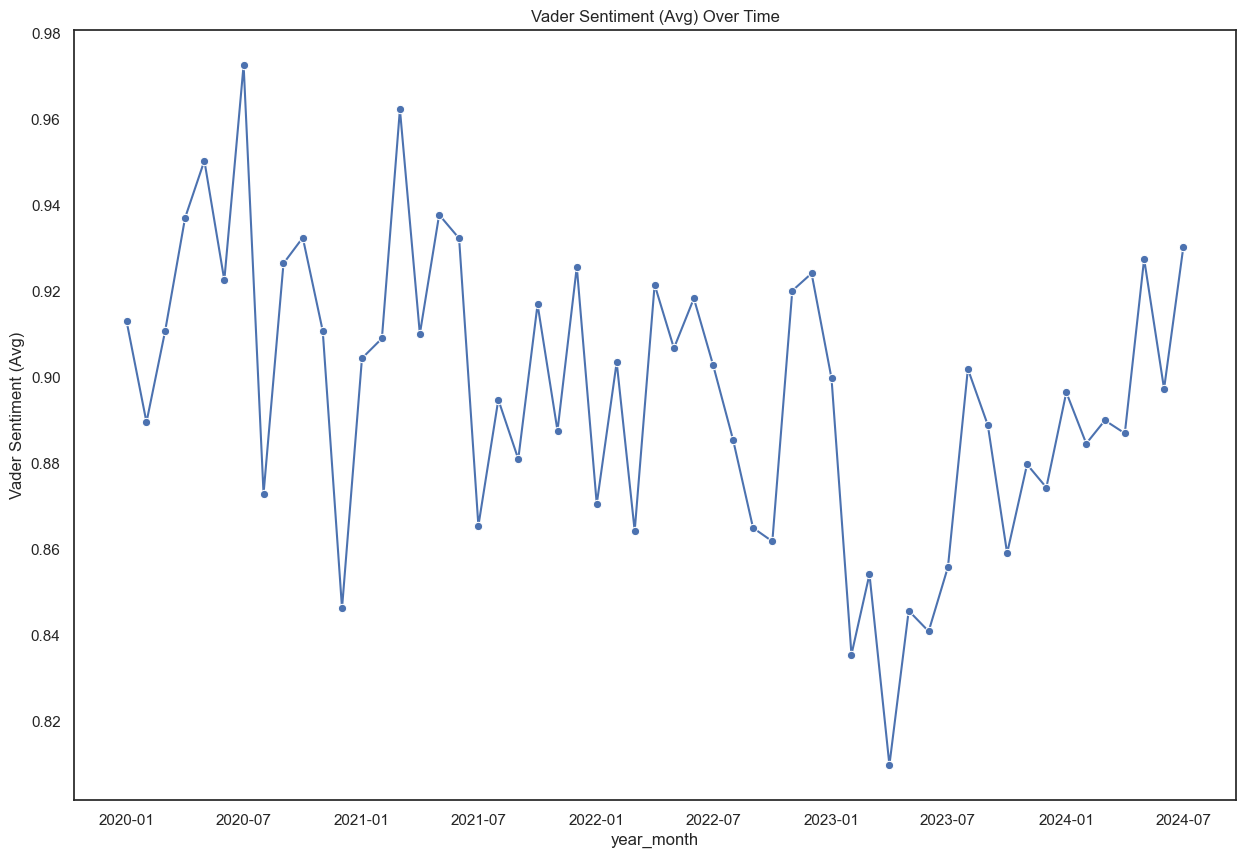

In [19]:
monthly_sentiment['year_month'] = pd.to_datetime(monthly_sentiment['year_month'])
sns.set(style="white")

plt.figure(figsize=(15, 10))
sns.lineplot(data=monthly_sentiment, x='year_month', y='average_vader_sentiment_score', marker='o')
plt.title('Vader Sentiment (Avg) Over Time', fontsize=12)
plt.ylabel('Vader Sentiment (Avg)', fontsize=12)
plt.show()

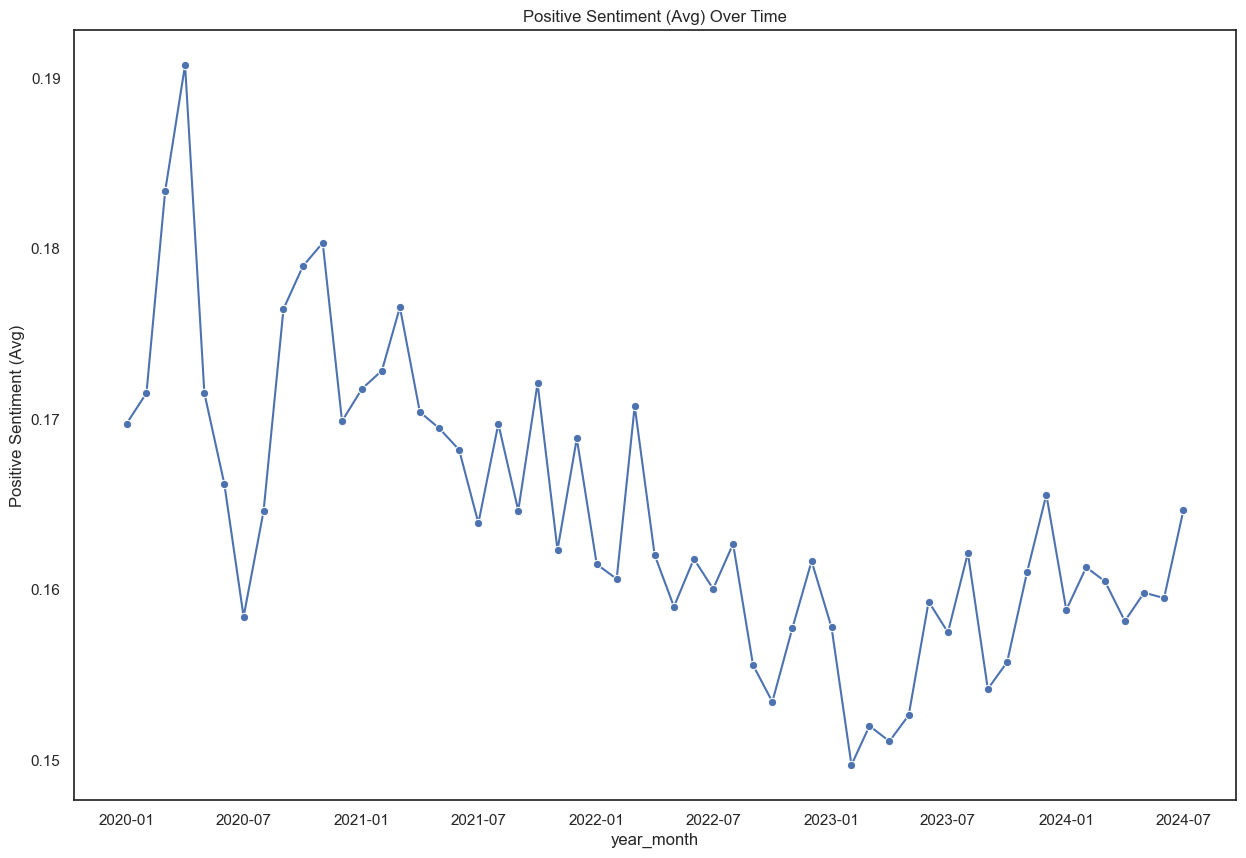

In [20]:
monthly_sentiment['year_month'] = pd.to_datetime(monthly_sentiment['year_month'])
sns.set(style="white")

plt.figure(figsize=(15, 10))
sns.lineplot(data=monthly_sentiment, x='year_month', y='average_vader_positive_score', marker='o')
plt.title('Positive Sentiment (Avg) Over Time', fontsize=12)
plt.ylabel('Positive Sentiment (Avg)', fontsize=12)
plt.show()

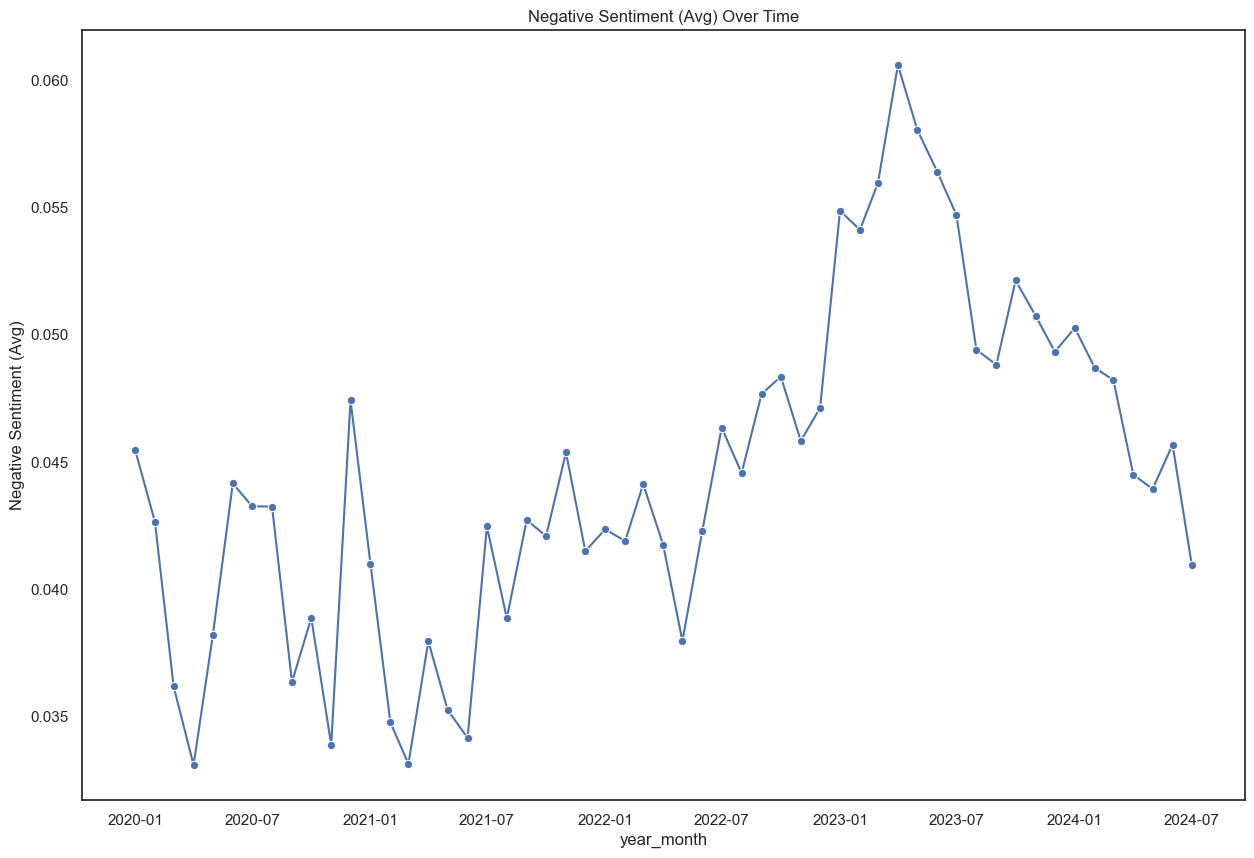

In [21]:
monthly_sentiment['year_month'] = pd.to_datetime(monthly_sentiment['year_month'])
sns.set(style="white")

plt.figure(figsize=(15, 10))
sns.lineplot(data=monthly_sentiment, x='year_month', y='average_vader_negative_score', marker='o')
plt.title('Negative Sentiment (Avg) Over Time', fontsize=12)
plt.ylabel('Negative Sentiment (Avg)', fontsize=12)
plt.show()

### 2. NER - Attach entities with sentiment

In [22]:
news_processed.head(10)

,url,date,language,title,text,year,month,day,text_ner,title_ner,text_cleaned,title_cleaned,text_lemmatized,title_lemmatized,text_tokenized,title_tokenized,text_word_count,vader_sentiment,vader_compound,vader_positive,vader_negative,year_month
0,https://www.fool.com/investing/2023/09/01/ai-stock-thats-screaming-bargain-you-should-buy/?source=eptyholnk0000202&utm_source=yahoo-host&utm_medium=feed&utm_campaign=article&yptr=yahoo?src=rss,2023-09-01,en,1 AI Stock That's a Screaming Bargain You Should Buy Hand Over Fist Right Now | The Motley Fool,\n\n1 AI Stock That's a Screaming Bargain You Should Buy Hand Over Fist Right Now | The Motley Fool\nPlease ensure Javascript is enabled for purposes of website accessibility\n\nSearch\n\nAccessibility\nLog In\n\nHelp\n\n\nJoin The Motley Fool\nAccessibility Menu\n\nOur Services\nInvesting Basics\n\nangle-down\n\nPremium Services\n\n\nStock Advisor\nOur Flagship Service\n\n\nReturn\n509%\n\n\nS&P Return\n132%\n\nRule Breakers\nHigh-growth Stocks\n\n\nReturn\n241%\n\n\nS&P Return\n111%\nRetur...,2023,9,1,AI Stock That s a Screaming Bargain You Should Buy Hand Over Fist Right Now The Motley Fool Please ensure Javascript is enabled for purposes of website accessibility Search Accessibility Log In Help Join The Motley Fool Accessibility Menu Our Services Investing Basics angle down Premium Services Stock Advisor Our Flagship Service Return S P Return Rule Breakers High growth Stocks Return S P Return Returns as of View Our Services Investing How to Invest Money What to Invest In How to Invest i...,AI Stock That s a Screaming Bargain You Should Buy Hand Over Fist Right Now The Motley Fool,ai stock screaming bargain buy hand fist right motley fool please ensure javascript enabled purposes website accessibility search accessibility log help join motley fool accessibility menu services investing basics angle premium services stock advisor flagship service return return rule breakers high growth stocks return return returns view services investing invest money invest invest stocks invest index funds invest etfs invest real estate financial dictionary best accounts best stock brok...,ai stock screaming bargain buy hand fist right motley fool,ai stock screaming bargain buy hand fist right motley fool please ensure javascript enabled purpose website accessibility search accessibility log help join motley fool accessibility menu service investing basic angle premium service stock advisor flagship service return return rule breaker high growth stock return return return view service investing invest money invest invest stock invest index fund invest etf invest real estate financial dictionary best account best stock broker best brok...,ai stock screaming bargain buy hand fist right motley fool,"[ai, stock, screaming, bargain, buy, hand, fist, right, motley, fool, please, ensure, javascript, enabled, purpose, website, accessibility, search, accessibility, log, help, join, motley, fool, accessibility, menu, service, investing, basic, angle, premium, service, stock, advisor, flagship, service, return, return, rule, breaker, high, growth, stock, return, return, return, view, service, investing, invest, money, invest, invest, stock, invest, index, fund, invest, etf, invest, real, estate...","[ai, stock, screaming, bargain, buy, hand, fist, right, motley, fool]",1475,positive,0.9999,0.301,0.070,2023-09
1,https://www.zmescience.com/science/news-science/chinese-communist-party-wants-to-use-an-ai-algorithm-to-read-minds-and-test-the-loyalty-of-its-members/,2022-07-20,en,"Chinese Communist Party wants to use an AI algorithm to ""read minds"" and test the loyalty of its members","\n\nChinese Communist Party wants to use an AI algorithm to ""read minds"" and test the loyalty of its members\n \n \nNews\n\nEnvironment\n\nHealth\n\nFuture\n\nSpace\n\nFeatures\n\nMore\n\nAbout\nThe Team\nAdvertise\nContribute\nOur stance on climate change\nPrivacy Policy\nContact\n No Result \n\n View All Result \n \n \n\n \n \n\n No R

In [23]:
def ner_spacy(col, target_lable = 'ORG', multi = -1):
    nlp = spacy.load("en_core_web_lg", exclude=['tok2vec','lemmatizer'])
    entities = []
    for doc in nlp.pipe(texts = col,  n_process=multi):
        ents = [ent.text for ent in doc.ents if ent.label_ == target_lable]
        entities.append(ents)
    return entities

In [24]:
%%time
news_processed['entity_org'] = ner_spacy(news_processed['text_lemmatized'], 'ORG', multi = -1)

CPU times: user 4min 52s, sys: 57.3 s, total: 5min 49s
Wall time: 9min 21s


In [25]:
%%time
news_processed['entity_person'] = ner_spacy(news_processed['text_lemmatized'], 'PERSON', multi = -1)

CPU times: user 4min 47s, sys: 47.7 s, total: 5min 34s
Wall time: 8min 25s


In [26]:
%%time
news_processed['entity_location'] = ner_spacy(news_processed['text_lemmatized'], 'GPE', multi = -1)

CPU times: user 5min 10s, sys: 1min, total: 6min 11s
Wall time: 10min 33s


### 3. NER Entity with Setiment Word Cloud Summary

In [27]:
def wordCloud(list_col, count = 20):
    des_list = list_col.explode()
    ten = Counter(des_list).most_common(count)
    word, freq = zip(*ten)
    data = dict(zip(list(word),list(freq)))
    wordcloud_obj = wordcloud.WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    max_words=30,
    stopwords = wordcloud.STOPWORDS)
    return wordcloud_obj.generate_from_frequencies(data)

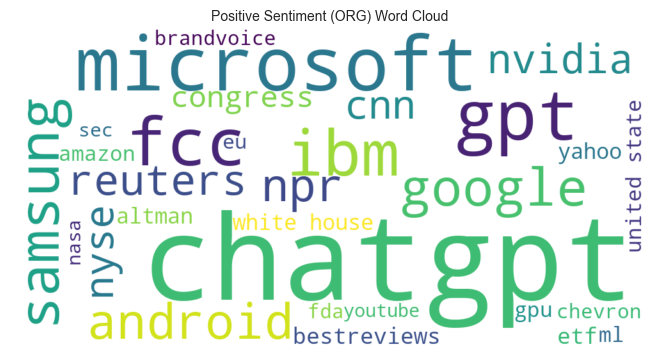

In [28]:
fig = plt.figure()
figsize = (18, 12)
plt.imshow(wordCloud(news_processed[news_processed['vader_sentiment'] == 'positive']['entity_org'], 
                     count=200), interpolation = 'bilinear')
plt.title('Positive Sentiment (ORG) Word Cloud', fontsize=10)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

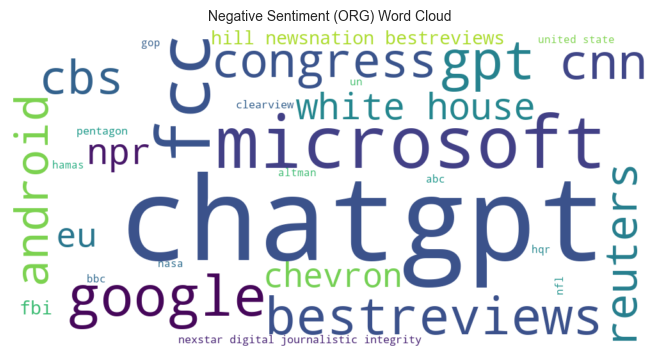

In [29]:
fig = plt.figure()
figsize = (18, 12)
plt.imshow(wordCloud(news_processed[news_processed['vader_sentiment'] == 'negative']['entity_org'], 
                     count=200), interpolation = 'bilinear')
plt.title('Negative Sentiment (ORG) Word Cloud', fontsize=10)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 4. Identify top candidates for AI integration - these can be related to any industry and yield positive or negative results (sentiment analysis).
- Suggest why certain types of jobs are more likely to be impacted by AI
- Plot a timeline to illustrate how the sentiment is changing over time

#### Entity (ORG)

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

def plot_ner(df, col):
    # Function to count entities for a given year
    def count_entities(df, year, entity_column):
        year_df = df[df['year'] == year]
        all_entities = [entity for sublist in year_df[entity_column].dropna() for entity in sublist]
        return dict(Counter(all_entities))
    
    # Initialize a dictionary to store counts by year and entity type
    entity_counts_by_year = defaultdict(lambda: defaultdict(Counter))
    
    # Count entities for each year and entity type
    for index, row in df.iterrows():
        year = row['year']
        for entity_type in ['entity_person', 'entity_org', 'entity_location']:
            entities = row[entity_type]
            if entities:
                entity_counts_by_year[year][entity_type].update(entities)
    
    # Convert defaultdict to a regular dict for easier viewing
    entity_counts_by_year = {year: dict(types) for year, types in entity_counts_by_year.items()}
    
    # Create a DataFrame for a given year
    def create_df_for_year(year, entity_counts_by_year):
        data = [
            {'entity_type': entity_type, 'entity': entity, 'count': count}
            for entity_type, entities in entity_counts_by_year[year].items()
            for entity, count in entities.items()
        ]
        return pd.DataFrame(data)
    
    # Create separate DataFrames for each year
    news_data = {}
    for year in range(2020, 2025):  # Including 2024
        news_data[year] = create_df_for_year(year, entity_counts_by_year)
    
    # Get top 200 entities per type per year
    entity_types = ['entity_org', 'entity_person', 'entity_location']
    top_entities = {}
    for year, df_year in news_data.items():
        top_entities[year] = {
            entity_type: df_year[df_year['entity_type'] == entity_type]
            .sort_values('count', ascending=False)
            .head(200)
            .reset_index(drop=True)
            for entity_type in entity_types
        }
    
    
   # Mapping for name normalization
    mapping = {
        'entity_org': {
            
            'financial glossary': 'Finance Industry',
            'morgan stanley': 'Finance Industry',
            'goldman sachs': 'Finance Industry',
            'zacks': 'Finance Industry',
            'etf': 'Finance Industry',
            'buy': 'Finance Industry',
            'price': 'Finance Industry',
            'nyse': 'Finance Industry',
            'nasdaq': 'Finance Industry',
            'earnings': 'Finance Industry',
            'fintech': 'Finance Industry',
            
            'medical': 'Healthcare Industry',
            'health': 'Healthcare Industry',
            'healthcare': 'Healthcare Industry',
            'cancer': 'Healthcare Industry',
            'covid': 'Healthcare Industry',
            'insurance': 'Healthcare Industry',
            'health insurance': 'Healthcare Industry',
            
            'facebook': 'Social Media Industry',
            'linkedin': 'Social Media Industry',
            'twitter': 'Social Media Industry',
            'whatsapp': 'Social Media Industry',
            'snap': 'Social Media Industry',
            'insta': 'Social Media Industry',
            'instagram': 'Social Media Industry',
            'youtube': 'Social Media Industry',
            
            'congress': 'Government',
            'government': 'Government',
            'white house': 'Government',
            'ccp': 'Government',
            'united state': 'Government',
            'palantir': 'Government',
            'senate': 'Government', 
            'nasa': 'Government',
            'pentagon': 'Government',
            'eu': 'Government',
            'bjp': 'Government',
            
            'court': 'Legal Industry',
            'law': 'Legal Industry',
            'legal': 'Legal Industry',
            'fbi': 'Legal Industry',
            'rule': 'Legal Industry',
            'case': 'Legal Industry',
            'gordon legal': 'Legal Industry',
            
            'nvidia': 'Semiconductor Industry',  
            'intel': 'Semiconductor Industry', 
            'intel corporation': 'Semiconductor Industry',
            'amd': 'Semiconductor Industry', 
            'chip': 'Semiconductor Industry', 
            'gpu': 'Semiconductor Industry', 
            'cpu': 'Semiconductor Industry',
            'tsmc': 'Semiconductor Industry',
            'semiconductor': 'Semiconductor Industry',
            'tpu': 'Semiconductor Industry',
            'apple': 'Semiconductor Industry',
            'tesla': 'Semiconductor Industry',
            'ibm': 'Semiconductor Industry',
            
            'aws': 'Technology Industry', 
            'android': 'Technology Industry', 
            'ai': 'Technology Industry', 
            'ml': 'Technology Industry', 
            'google': 'Technology Industry', 
            'microsoft': 'Technology Industry',
            'bard': 'Technology Industry',
            'openai': 'Technology Industry',
            'chatgpt': 'Technology Industry',
            'gpt': 'Technology Industry',
            'gemini': 'Technology Industry',
            'bing': 'Technology Industry',
            'bing': 'Technology Industry',
            'google news': 'Technology Industry',
            'google deepmind': 'Technology Industry',
            
            'doordash': 'Food Delivery Industry',
            'instacart': 'Food Delivery Industry',
            'legal': 'Food Delivery Industry',
            
            'waymo': 'Transportation Industry',
            'ford': 'Transportation Industry',
            'argo ai': 'Transportation Industry',
            
            'walt disney': 'Entertainment Industry',
            'netflix': 'Entertainment Industry',
            'discovery': 'Entertainment Industry',
            
            'school authority': 'Academical Institutions',
            'mit harvard university': 'Academical Institutions'
            
        },
        'entity_person': {
            'Biden': 'Joe Biden',
            'Musk': 'Elon Musk', 
            'Trump': 'Donald Trump',
            'Pichai': 'Sundar Pichai', 
            'Zuckerberg': 'Mark Zuckerberg',
            'Bankman Fried': 'Sam Bankman Fried', 
            'Buffett': 'Warren Buffett',
            'Putin': 'Vladimir Putin', 
            'Huang': 'Jensen Huang', 
            'Timnit Gebru': 'Gebru'
        },
        'entity_location': {
            'united state': 'USA',
            'america': 'USA',
            'california': 'USA', 
            'florida': 'USA',
            'new york': 'USA',
            'ny': 'USA',
            'texas': 'USA',
            'russia': 'Russia', 
            'india': 'India',
            'china': 'China', 
            'israel': 'Israel', 
            'germany': 'Germany',
            'taiwan': 'Taiwan',
            'beijing': 'China',
            'france': 'France',
            'uk': 'United Kingdom',
            'united kingdom': 'United Kingdom',
            'london': 'United Kingdom',
            'japan': 'Japan',
            'tokyo': 'Japan'
        }
    }
    
    key_entities = {
        'entity_org': [
            'Semiconductor Industry', 'Technology Industry', 'Social Media Industry', 'Healthcare Industry', 
            'Finance Industry', 'Government', 'Legal Industry', 'Transportation Industry',
            'Entertainment Industry', 'Food Delivery Industry', 'Academical Institutions'
        ],
        'entity_person': [
            'Biden', 'Joe Biden', 'Elon Musk', 'Musk', 'Donald Trump', 'Trump', 'Gebru', 
            'Sundar Pichai', 'Pichai', 'Narendra Modi', 'Rebekah Jones', 'Mark Zuckerberg', 
            'Eric Schmidt', 'Bill Gates', 'Michael Kratsios', 'Frida Polli', 'Bankman Fried', 
            'Sam Bankman Fried', 'Zuckerberg', 'Warren Buffett', 'Buffett', 'Vladimir Putin', 
            'Putin', 'Sam Altman', 'Satya Nadella', 'Geoffrey Hinton', 'Jensen Huang', 'Huang', 
            'Steve Wozniak', 'Gary Marcus'
        ],
        'entity_location': [
            'USA', 'Russia', 'China', 'United Kingdom', 'Germany', 
            'France', 'India', 'Israel', 'Taiwan', 'Japan'
        ]
    }
    
    # Normalize entity names
    def normalize_entities(df, col):
        if col in mapping:
            df['entity'] = df['entity'].replace(mapping[col])
        return df
    
    # Get counts for key entities
    def get_counts(df, year, col):
        filtered_df = df[df['entity'].isin(key_entities[col])]
        counts = filtered_df.groupby('entity')['count'].sum()
        counts.name = year
        return counts
    
    # Process each year for the specified entity type
    combined_counts = pd.concat([
        get_counts(normalize_entities(pd.DataFrame(top_entities[year][col]), col), year, col)
        for year in range(2020, 2025)  # Including 2024
    ], axis=1).fillna(0).reindex(key_entities[col], fill_value=0)
    
    # Ensure the 'entity' column is present
    combined_counts = combined_counts.reset_index().rename(columns={'index': 'entity'})
    
    # Sum counts across all years
    combined_counts['total_count'] = combined_counts.iloc[:, 1:].sum(axis=1)
    
    # Sort by total count
    combined_counts_sorted = combined_counts.sort_values(by='total_count', ascending=False)
    
    # Plotting the data (combined total count for all years)
    plt.figure(figsize=(15, 10))
    sns.barplot(
        data=combined_counts_sorted, x='entity', y='total_count', palette='viridis'
    )
    
    # Enhancing the plot
    plt.title('Total Count of {} Across All Years'.format(col))
    plt.xlabel('Entity')
    plt.ylabel('Total Count')
    plt.xticks(rotation=90)
    plt.grid(True)
    
    # Show plot
    plt.show()

# Example usage:
# plot_ner(df_news, 'entity_org')  # For organizations
# plot_ner(df_news, 'entity_person')  # For persons
# plot_ner(df_news, 'entity_location')  # For locations


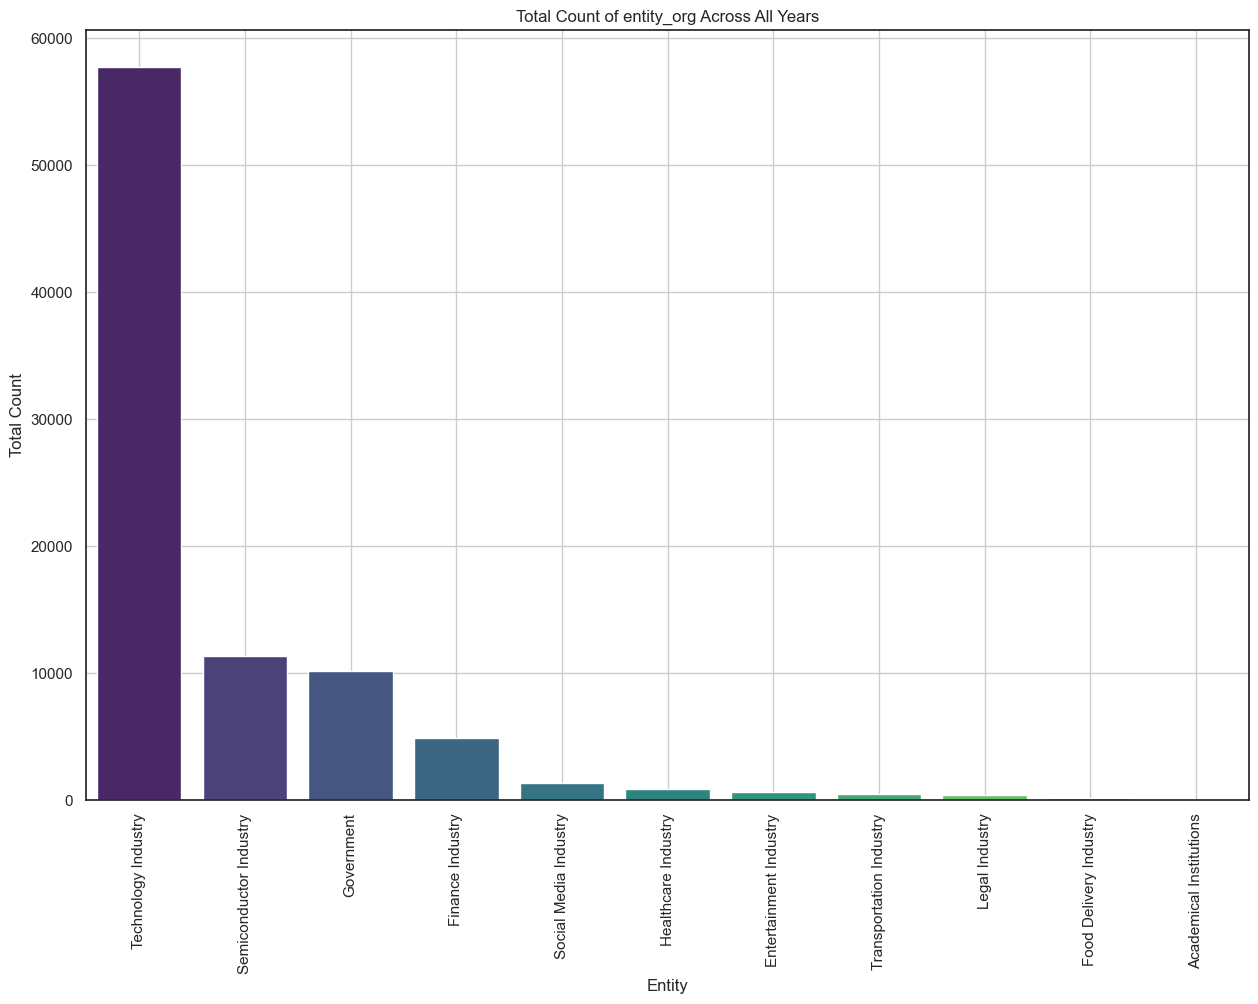

CPU times: user 3.61 s, sys: 683 ms, total: 4.3 s
Wall time: 4.51 s


In [31]:
%%time
plot_ner(news_processed[news_processed['vader_sentiment'] == 'positive'], 'entity_org')

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

def plot_ner_postive(df, col):
    # Function to get sentiment data for a given year
    def get_sentiment_data(df, year, entity_column):
        year_df = df[df['year'] == year]
        sentiment_data = []
        for index, row in year_df.iterrows():
            entities = row[entity_column]
            sentiment = row['vader_positive']
            if entities:
                for entity in entities:
                    sentiment_data.append({'entity': entity, 'sentiment': sentiment})
        return pd.DataFrame(sentiment_data)
    
    # Initialize a dictionary to store sentiment data by year and entity type
    sentiment_data_by_year = defaultdict(pd.DataFrame)
    
    # Collect sentiment data for each year and entity type
    for year in range(2020, 2025):  # Including 2024
        sentiment_data_by_year[year] = get_sentiment_data(df, year, col)
    
    # Aggregate sentiment data
    def aggregate_sentiment(df, year, col):
        filtered_df = df[df['entity'].isin(key_entities[col])]
        sentiment_avg = filtered_df.groupby('entity')['sentiment'].mean()
        sentiment_avg.name = year
        return sentiment_avg
    
  # Mapping for name normalization
    mapping = {
        'entity_org': {
            
            'financial glossary': 'Finance Industry',
            'morgan stanley': 'Finance Industry',
            'goldman sachs': 'Finance Industry',
            'zacks': 'Finance Industry',
            'etf': 'Finance Industry',
            'buy': 'Finance Industry',
            'price': 'Finance Industry',
            'nyse': 'Finance Industry',
            'nasdaq': 'Finance Industry',
            'earnings': 'Finance Industry',
            'fintech': 'Finance Industry',
            
            'medical': 'Healthcare Industry',
            'health': 'Healthcare Industry',
            'healthcare': 'Healthcare Industry',
            'cancer': 'Healthcare Industry',
            'covid': 'Healthcare Industry',
            'insurance': 'Healthcare Industry',
            'health insurance': 'Healthcare Industry',
            
            'facebook': 'Social Media Industry',
            'linkedin': 'Social Media Industry',
            'twitter': 'Social Media Industry',
            'whatsapp': 'Social Media Industry',
            'snap': 'Social Media Industry',
            'insta': 'Social Media Industry',
            'instagram': 'Social Media Industry',
            'youtube': 'Social Media Industry',
            
            'congress': 'Government',
            'government': 'Government',
            'white house': 'Government',
            'ccp': 'Government',
            'united state': 'Government',
            'palantir': 'Government',
            'senate': 'Government', 
            'nasa': 'Government',
            'pentagon': 'Government',
            'eu': 'Government',
            'bjp': 'Government',
            
            'court': 'Legal Industry',
            'law': 'Legal Industry',
            'legal': 'Legal Industry',
            'fbi': 'Legal Industry',
            'rule': 'Legal Industry',
            'case': 'Legal Industry',
            'gordon legal': 'Legal Industry',
            
            'nvidia': 'Semiconductor Industry',  
            'intel': 'Semiconductor Industry', 
            'intel corporation': 'Semiconductor Industry',
            'amd': 'Semiconductor Industry', 
            'chip': 'Semiconductor Industry', 
            'gpu': 'Semiconductor Industry', 
            'cpu': 'Semiconductor Industry',
            'tsmc': 'Semiconductor Industry',
            'semiconductor': 'Semiconductor Industry',
            'tpu': 'Semiconductor Industry',
            'apple': 'Semiconductor Industry',
            'tesla': 'Semiconductor Industry',
            'ibm': 'Semiconductor Industry',
            
            'aws': 'Technology Industry', 
            'android': 'Technology Industry', 
            'ai': 'Technology Industry', 
            'ml': 'Technology Industry', 
            'google': 'Technology Industry', 
            'microsoft': 'Technology Industry',
            'bard': 'Technology Industry',
            'openai': 'Technology Industry',
            'chatgpt': 'Technology Industry',
            'gpt': 'Technology Industry',
            'gemini': 'Technology Industry',
            'bing': 'Technology Industry',
            'bing': 'Technology Industry',
            'google news': 'Technology Industry',
            'google deepmind': 'Technology Industry',
            
            'doordash': 'Food Delivery Industry',
            'instacart': 'Food Delivery Industry',
            'legal': 'Food Delivery Industry',
            
            'waymo': 'Transportation Industry',
            'ford': 'Transportation Industry',
            'argo ai': 'Transportation Industry',
            
            'walt disney': 'Entertainment Industry',
            'netflix': 'Entertainment Industry',
            'discovery': 'Entertainment Industry',
            
            'school authority': 'Academical Institutions',
            'mit harvard university': 'Academical Institutions'
            
        },
        'entity_person': {
            'Biden': 'Joe Biden',
            'Musk': 'Elon Musk', 
            'Trump': 'Donald Trump',
            'Pichai': 'Sundar Pichai', 
            'Zuckerberg': 'Mark Zuckerberg',
            'Bankman Fried': 'Sam Bankman Fried', 
            'Buffett': 'Warren Buffett',
            'Putin': 'Vladimir Putin', 
            'Huang': 'Jensen Huang', 
            'Timnit Gebru': 'Gebru'
        },
        'entity_location': {
            'united state': 'USA',
            'america': 'USA',
            'california': 'USA', 
            'florida': 'USA',
            'new york': 'USA',
            'ny': 'USA',
            'texas': 'USA',
            'russia': 'Russia', 
            'india': 'India',
            'china': 'China', 
            'israel': 'Israel', 
            'germany': 'Germany',
            'taiwan': 'Taiwan',
            'beijing': 'China',
            'france': 'France',
            'uk': 'United Kingdom',
            'united kingdom': 'United Kingdom',
            'london': 'United Kingdom',
            'japan': 'Japan',
            'tokyo': 'Japan'
        }
    }
    
    key_entities = {
        'entity_org': [
            'Semiconductor Industry', 'Technology Industry', 'Social Media Industry', 'Healthcare Industry', 
            'Finance Industry', 'Government', 'Legal Industry', 'Transportation Industry',
            'Entertainment Industry', 'Food Delivery Industry', 'Academical Institutions'
        ],
        'entity_person': [
            'Biden', 'Joe Biden', 'Elon Musk', 'Musk', 'Donald Trump', 'Trump', 'Gebru', 
            'Sundar Pichai', 'Pichai', 'Narendra Modi', 'Rebekah Jones', 'Mark Zuckerberg', 
            'Eric Schmidt', 'Bill Gates', 'Michael Kratsios', 'Frida Polli', 'Bankman Fried', 
            'Sam Bankman Fried', 'Zuckerberg', 'Warren Buffett', 'Buffett', 'Vladimir Putin', 
            'Putin', 'Sam Altman', 'Satya Nadella', 'Geoffrey Hinton', 'Jensen Huang', 'Huang', 
            'Steve Wozniak', 'Gary Marcus'
        ],
        'entity_location': [
            'USA', 'Russia', 'China', 'United Kingdom', 'Germany', 
            'France', 'India', 'Israel', 'Taiwan', 'Japan'
        ]
    }
    
    
    # Normalize entity names
    def normalize_entities(df, col):
        if col in mapping:
            df['entity'] = df['entity'].replace(mapping[col])
        return df
    
    # Process each year for the specified entity type
    combined_sentiment = pd.concat([
        aggregate_sentiment(normalize_entities(sentiment_data_by_year[year], col), year, col)
        for year in range(2020, 2025)  # Including 2024
    ], axis=1).fillna(0).reindex(key_entities[col], fill_value=0)
    
    # Ensure the 'entity' column is present
    combined_sentiment = combined_sentiment.reset_index().rename(columns={'index': 'entity'})
    
    # Compute average sentiment across all years
    combined_sentiment['average_sentiment'] = combined_sentiment.iloc[:, 1:].mean(axis=1)
    
    # Sort by average sentiment
    combined_sentiment_sorted = combined_sentiment.sort_values(by='average_sentiment', ascending=False)
    
    # Plotting the data (average sentiment across all years)
    plt.figure(figsize=(15, 10))
    barplot = sns.barplot(
        data=combined_sentiment_sorted, x='entity', y='average_sentiment'
    )

    # Enhancing the plot
    plt.title('Average Positive Sentiment of {} Across All Years'.format(col))
    plt.xlabel('Entity')
    plt.ylabel('Average Positive Sentiment')
    plt.xticks(rotation=90)
    plt.grid(True)
    
    # Show plot
    plt.show()

# Example usage:
# plot_ner(df_news, 'entity_org')  # For organizations
# plot_ner(df_news, 'entity_person')  # For persons
# plot_ner(df_news, 'entity_location')  # For locations


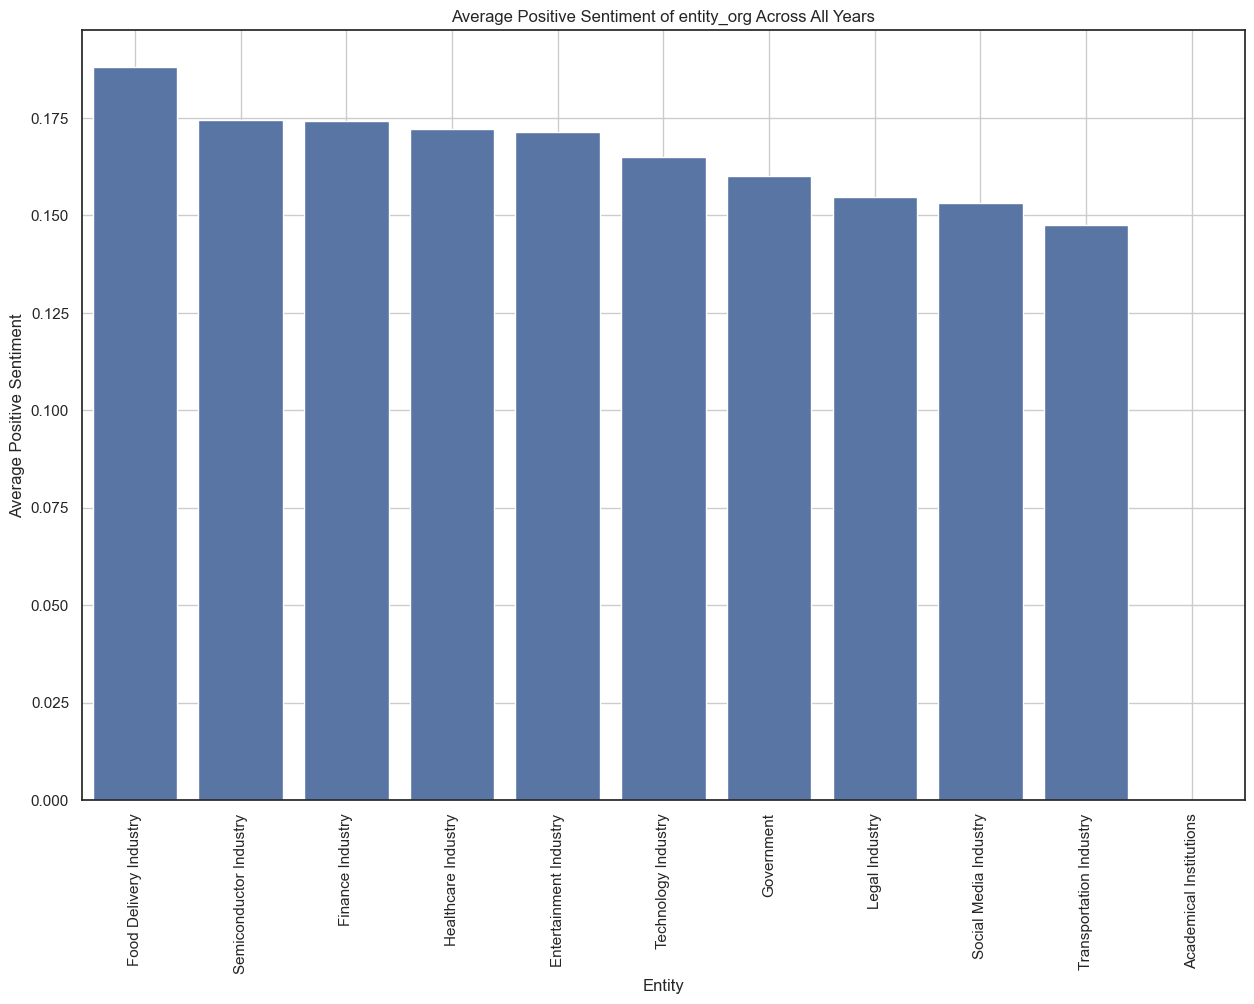

CPU times: user 9.16 s, sys: 161 ms, total: 9.32 s
Wall time: 9.35 s


In [33]:
%%time
plot_ner_postive(news_processed[news_processed['vader_sentiment'] == 'positive'], 'entity_org')

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

def plot_ner_negative(df, col):
    # Function to get sentiment data for a given year
    def get_sentiment_data(df, year, entity_column):
        year_df = df[df['year'] == year]
        sentiment_data = []
        for index, row in year_df.iterrows():
            entities = row[entity_column]
            sentiment = -row['vader_negative']
            if entities:
                for entity in entities:
                    sentiment_data.append({'entity': entity, 'sentiment': sentiment})
        return pd.DataFrame(sentiment_data)
    
    # Initialize a dictionary to store sentiment data by year and entity type
    sentiment_data_by_year = defaultdict(pd.DataFrame)
    
    # Collect sentiment data for each year and entity type
    for year in range(2020, 2025):  # Including 2024
        sentiment_data_by_year[year] = get_sentiment_data(df, year, col)
    
    # Aggregate sentiment data
    def aggregate_sentiment(df, year, col):
        filtered_df = df[df['entity'].isin(key_entities[col])]
        sentiment_avg = filtered_df.groupby('entity')['sentiment'].mean()
        sentiment_avg.name = year
        return sentiment_avg
    
  # Mapping for name normalization
    mapping = {
        'entity_org': {
            
            'financial glossary': 'Finance Industry',
            'morgan stanley': 'Finance Industry',
            'goldman sachs': 'Finance Industry',
            'zacks': 'Finance Industry',
            'etf': 'Finance Industry',
            'buy': 'Finance Industry',
            'price': 'Finance Industry',
            'nyse': 'Finance Industry',
            'nasdaq': 'Finance Industry',
            'earnings': 'Finance Industry',
            'fintech': 'Finance Industry',
            
            'medical': 'Healthcare Industry',
            'health': 'Healthcare Industry',
            'healthcare': 'Healthcare Industry',
            'cancer': 'Healthcare Industry',
            'covid': 'Healthcare Industry',
            'insurance': 'Healthcare Industry',
            'health insurance': 'Healthcare Industry',
            
            'facebook': 'Social Media Industry',
            'linkedin': 'Social Media Industry',
            'twitter': 'Social Media Industry',
            'whatsapp': 'Social Media Industry',
            'snap': 'Social Media Industry',
            'insta': 'Social Media Industry',
            'instagram': 'Social Media Industry',
            'youtube': 'Social Media Industry',
            
            'congress': 'Government',
            'government': 'Government',
            'white house': 'Government',
            'ccp': 'Government',
            'united state': 'Government',
            'palantir': 'Government',
            'senate': 'Government', 
            'nasa': 'Government',
            'pentagon': 'Government',
            'eu': 'Government',
            'bjp': 'Government',
            
            'court': 'Legal Industry',
            'law': 'Legal Industry',
            'legal': 'Legal Industry',
            'fbi': 'Legal Industry',
            'rule': 'Legal Industry',
            'case': 'Legal Industry',
            'gordon legal': 'Legal Industry',
            
            'nvidia': 'Semiconductor Industry',  
            'intel': 'Semiconductor Industry', 
            'intel corporation': 'Semiconductor Industry',
            'amd': 'Semiconductor Industry', 
            'chip': 'Semiconductor Industry', 
            'gpu': 'Semiconductor Industry', 
            'cpu': 'Semiconductor Industry',
            'tsmc': 'Semiconductor Industry',
            'semiconductor': 'Semiconductor Industry',
            'tpu': 'Semiconductor Industry',
            'apple': 'Semiconductor Industry',
            'tesla': 'Semiconductor Industry',
            'ibm': 'Semiconductor Industry',
            
            'aws': 'Technology Industry', 
            'android': 'Technology Industry', 
            'ai': 'Technology Industry', 
            'ml': 'Technology Industry', 
            'google': 'Technology Industry', 
            'microsoft': 'Technology Industry',
            'bard': 'Technology Industry',
            'openai': 'Technology Industry',
            'chatgpt': 'Technology Industry',
            'gpt': 'Technology Industry',
            'gemini': 'Technology Industry',
            'bing': 'Technology Industry',
            'bing': 'Technology Industry',
            'google news': 'Technology Industry',
            'google deepmind': 'Technology Industry',
            
            'doordash': 'Food Delivery Industry',
            'instacart': 'Food Delivery Industry',
            'legal': 'Food Delivery Industry',
            
            'waymo': 'Transportation Industry',
            'ford': 'Transportation Industry',
            'argo ai': 'Transportation Industry',
            
            'walt disney': 'Entertainment Industry',
            'netflix': 'Entertainment Industry',
            'discovery': 'Entertainment Industry',
            
            'school authority': 'Academical Institutions',
            'mit harvard university': 'Academical Institutions'
            
        },
        'entity_person': {
            'Biden': 'Joe Biden',
            'Musk': 'Elon Musk', 
            'Trump': 'Donald Trump',
            'Pichai': 'Sundar Pichai', 
            'Zuckerberg': 'Mark Zuckerberg',
            'Bankman Fried': 'Sam Bankman Fried', 
            'Buffett': 'Warren Buffett',
            'Putin': 'Vladimir Putin', 
            'Huang': 'Jensen Huang', 
            'Timnit Gebru': 'Gebru'
        },
        'entity_location': {
            'united state': 'USA',
            'america': 'USA',
            'california': 'USA', 
            'florida': 'USA',
            'new york': 'USA',
            'ny': 'USA',
            'texas': 'USA',
            'russia': 'Russia', 
            'india': 'India',
            'china': 'China', 
            'israel': 'Israel', 
            'germany': 'Germany',
            'taiwan': 'Taiwan',
            'beijing': 'China',
            'france': 'France',
            'uk': 'United Kingdom',
            'united kingdom': 'United Kingdom',
            'london': 'United Kingdom',
            'japan': 'Japan',
            'tokyo': 'Japan'
        }
    }
    
    key_entities = {
        'entity_org': [
            'Semiconductor Industry', 'Technology Industry', 'Social Media Industry', 'Healthcare Industry', 
            'Finance Industry', 'Government', 'Legal Industry', 'Transportation Industry',
            'Entertainment Industry', 'Food Delivery Industry', 'Academical Institutions'
        ],
        'entity_person': [
            'Biden', 'Joe Biden', 'Elon Musk', 'Musk', 'Donald Trump', 'Trump', 'Gebru', 
            'Sundar Pichai', 'Pichai', 'Narendra Modi', 'Rebekah Jones', 'Mark Zuckerberg', 
            'Eric Schmidt', 'Bill Gates', 'Michael Kratsios', 'Frida Polli', 'Bankman Fried', 
            'Sam Bankman Fried', 'Zuckerberg', 'Warren Buffett', 'Buffett', 'Vladimir Putin', 
            'Putin', 'Sam Altman', 'Satya Nadella', 'Geoffrey Hinton', 'Jensen Huang', 'Huang', 
            'Steve Wozniak', 'Gary Marcus'
        ],
        'entity_location': [
            'USA', 'Russia', 'China', 'United Kingdom', 'Germany', 
            'France', 'India', 'Israel', 'Taiwan', 'Japan'
        ]
    }
    
    
    # Normalize entity names
    def normalize_entities(df, col):
        if col in mapping:
            df['entity'] = df['entity'].replace(mapping[col])
        return df
    
    # Process each year for the specified entity type
    combined_sentiment = pd.concat([
        aggregate_sentiment(normalize_entities(sentiment_data_by_year[year], col), year, col)
        for year in range(2020, 2025)  # Including 2024
    ], axis=1).fillna(0).reindex(key_entities[col], fill_value=0)
    
    # Ensure the 'entity' column is present
    combined_sentiment = combined_sentiment.reset_index().rename(columns={'index': 'entity'})
    
    # Compute average sentiment across all years
    combined_sentiment['average_sentiment'] = combined_sentiment.iloc[:, 1:].mean(axis=1)
    
    # Sort by average sentiment
    combined_sentiment_sorted = combined_sentiment.sort_values(by='average_sentiment', ascending=False)
    
    # Plotting the data (average sentiment across all years)
    plt.figure(figsize=(15, 10))
    barplot = sns.barplot(
        data=combined_sentiment_sorted, x='entity', y='average_sentiment'
    )

    # Enhancing the plot
    plt.title('Average Negative Sentiment of {} Across All Years'.format(col))
    plt.xlabel('Entity')
    plt.ylabel('Average Negative Sentiment')
    plt.xticks(rotation=90)
    plt.grid(True)
    
    # Show plot
    plt.show()

# Example usage:
# plot_ner(df_news, 'entity_org')  # For organizations
# plot_ner(df_news, 'entity_person')  # For persons
# plot_ner(df_news, 'entity_location')  # For locations


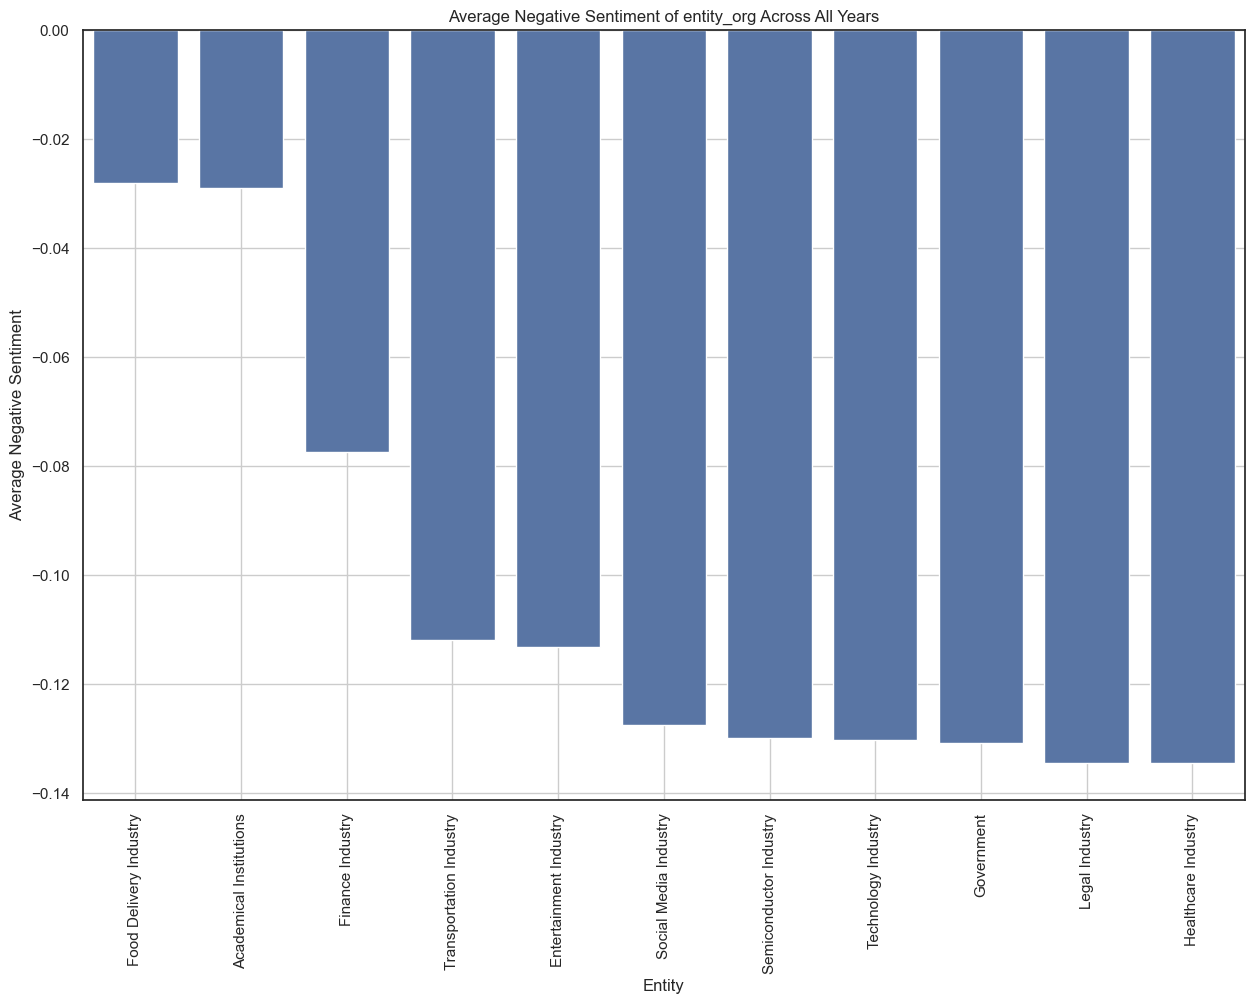

CPU times: user 754 ms, sys: 75.6 ms, total: 829 ms
Wall time: 629 ms


In [35]:
%%time
plot_ner_negative(news_processed[news_processed['vader_sentiment'] == 'negative'], 'entity_org')

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

def plot_ner_time(df, col):
    # Function to count entities for a given year
    def count_entities(df, year, entity_column):
        year_df = df[df['year'] == year]
        all_entities = [entity for sublist in year_df[entity_column].dropna() for entity in sublist]
        return dict(Counter(all_entities))
    
    # Initialize a dictionary to store counts by year and entity type
    entity_counts_by_year = defaultdict(lambda: defaultdict(Counter))
    
    # Count entities for each year and entity type
    for index, row in df.iterrows():
        year = row['year']
        for entity_type in ['entity_person', 'entity_org', 'entity_location']:
            entities = row[entity_type]
            if entities:
                entity_counts_by_year[year][entity_type].update(entities)
    
    # Convert defaultdict to a regular dict for easier viewing
    entity_counts_by_year = {year: dict(types) for year, types in entity_counts_by_year.items()}
    
    # Create a DataFrame for a given year
    def create_df_for_year(year, entity_counts_by_year):
        data = [
            {'entity_type': entity_type, 'entity': entity, 'count': count}
            for entity_type, entities in entity_counts_by_year[year].items()
            for entity, count in entities.items()
        ]
        return pd.DataFrame(data)
    
    # Create separate DataFrames for each year
    news_data = {}
    for year in range(2020, 2025): 
        news_data[year] = create_df_for_year(year, entity_counts_by_year)
    
    # Get top 200 entities per type per year
    entity_types = ['entity_org', 'entity_person', 'entity_location']
    top_entities = {}
    for year, df_year in news_data.items():
        top_entities[year] = {
            entity_type: df_year[df_year['entity_type'] == entity_type]
            .sort_values('count', ascending=False)
            .head(200)
            .reset_index(drop=True)
            for entity_type in entity_types
        }
    
  # Mapping for name normalization
    mapping = {
        'entity_org': {
            
            'financial glossary': 'Finance Industry',
            'morgan stanley': 'Finance Industry',
            'goldman sachs': 'Finance Industry',
            'zacks': 'Finance Industry',
            'etf': 'Finance Industry',
            'buy': 'Finance Industry',
            'price': 'Finance Industry',
            'nyse': 'Finance Industry',
            'nasdaq': 'Finance Industry',
            'earnings': 'Finance Industry',
            'fintech': 'Finance Industry',
            
            'medical': 'Healthcare Industry',
            'health': 'Healthcare Industry',
            'healthcare': 'Healthcare Industry',
            'cancer': 'Healthcare Industry',
            'covid': 'Healthcare Industry',
            'insurance': 'Healthcare Industry',
            'health insurance': 'Healthcare Industry',
            
            'facebook': 'Social Media Industry',
            'linkedin': 'Social Media Industry',
            'twitter': 'Social Media Industry',
            'whatsapp': 'Social Media Industry',
            'snap': 'Social Media Industry',
            'insta': 'Social Media Industry',
            'instagram': 'Social Media Industry',
            'youtube': 'Social Media Industry',
            
            'congress': 'Government',
            'government': 'Government',
            'white house': 'Government',
            'ccp': 'Government',
            'united state': 'Government',
            'palantir': 'Government',
            'senate': 'Government', 
            'nasa': 'Government',
            'pentagon': 'Government',
            'eu': 'Government',
            'bjp': 'Government',
            
            'court': 'Legal Industry',
            'law': 'Legal Industry',
            'legal': 'Legal Industry',
            'fbi': 'Legal Industry',
            'rule': 'Legal Industry',
            'case': 'Legal Industry',
            'gordon legal': 'Legal Industry',
            
            'nvidia': 'Semiconductor Industry',  
            'intel': 'Semiconductor Industry', 
            'intel corporation': 'Semiconductor Industry',
            'amd': 'Semiconductor Industry', 
            'chip': 'Semiconductor Industry', 
            'gpu': 'Semiconductor Industry', 
            'cpu': 'Semiconductor Industry',
            'tsmc': 'Semiconductor Industry',
            'semiconductor': 'Semiconductor Industry',
            'tpu': 'Semiconductor Industry',
            'apple': 'Semiconductor Industry',
            'tesla': 'Semiconductor Industry',
            'ibm': 'Semiconductor Industry',
            
            'aws': 'Technology Industry', 
            'android': 'Technology Industry', 
            'ai': 'Technology Industry', 
            'ml': 'Technology Industry', 
            'google': 'Technology Industry', 
            'microsoft': 'Technology Industry',
            'bard': 'Technology Industry',
            'openai': 'Technology Industry',
            'chatgpt': 'Technology Industry',
            'gpt': 'Technology Industry',
            'gemini': 'Technology Industry',
            'bing': 'Technology Industry',
            'bing': 'Technology Industry',
            'google news': 'Technology Industry',
            'google deepmind': 'Technology Industry',
            
            'doordash': 'Food Delivery Industry',
            'instacart': 'Food Delivery Industry',
            'legal': 'Food Delivery Industry',
            
            'waymo': 'Transportation Industry',
            'ford': 'Transportation Industry',
            'argo ai': 'Transportation Industry',
            
            'walt disney': 'Entertainment Industry',
            'netflix': 'Entertainment Industry',
            'discovery': 'Entertainment Industry',
            
            'school authority': 'Academical Institutions',
            'mit harvard university': 'Academical Institutions'
            
        },
        'entity_person': {
            'Biden': 'Joe Biden',
            'Musk': 'Elon Musk', 
            'Trump': 'Donald Trump',
            'Pichai': 'Sundar Pichai', 
            'Zuckerberg': 'Mark Zuckerberg',
            'Bankman Fried': 'Sam Bankman Fried', 
            'Buffett': 'Warren Buffett',
            'Putin': 'Vladimir Putin', 
            'Huang': 'Jensen Huang', 
            'Timnit Gebru': 'Gebru'
        },
        'entity_location': {
            'united state': 'USA',
            'america': 'USA',
            'california': 'USA', 
            'florida': 'USA',
            'new york': 'USA',
            'ny': 'USA',
            'texas': 'USA',
            'russia': 'Russia', 
            'india': 'India',
            'china': 'China', 
            'israel': 'Israel', 
            'germany': 'Germany',
            'taiwan': 'Taiwan',
            'beijing': 'China',
            'france': 'France',
            'uk': 'United Kingdom',
            'united kingdom': 'United Kingdom',
            'london': 'United Kingdom',
            'japan': 'Japan',
            'tokyo': 'Japan'
        }
    }
    
    key_entities = {
        'entity_org': [
            'Semiconductor Industry', 'Technology Industry', 'Social Media Industry', 'Healthcare Industry', 
            'Finance Industry', 'Government', 'Legal Industry', 'Transportation Industry',
            'Entertainment Industry', 'Food Delivery Industry', 'Academical Institutions'
        ],
        'entity_person': [
            'Biden', 'Joe Biden', 'Elon Musk', 'Musk', 'Donald Trump', 'Trump', 'Gebru', 
            'Sundar Pichai', 'Pichai', 'Narendra Modi', 'Rebekah Jones', 'Mark Zuckerberg', 
            'Eric Schmidt', 'Bill Gates', 'Michael Kratsios', 'Frida Polli', 'Bankman Fried', 
            'Sam Bankman Fried', 'Zuckerberg', 'Warren Buffett', 'Buffett', 'Vladimir Putin', 
            'Putin', 'Sam Altman', 'Satya Nadella', 'Geoffrey Hinton', 'Jensen Huang', 'Huang', 
            'Steve Wozniak', 'Gary Marcus'
        ],
        'entity_location': [
            'USA', 'Russia', 'China', 'United Kingdom', 'Germany', 
            'France', 'India', 'Israel', 'Taiwan', 'Japan'
        ]
    }
    
    
    # Normalize entity names
    def normalize_entities(df, col):
        if col in mapping:
            df['entity'] = df['entity'].replace(mapping[col])
        return df
    
    # Get counts for key entities
    def get_counts(df, year, col):
        filtered_df = df[df['entity'].isin(key_entities[col])]
        counts = filtered_df.groupby('entity')['count'].sum()
        counts.name = year
        return counts
    
    # Process each year for the specified entity type
    combined_counts = pd.concat([
        get_counts(normalize_entities(pd.DataFrame(top_entities[year][col]), col), year, col)
        for year in range(2020, 2025)  
    ], axis=1).fillna(0).reindex(key_entities[col], fill_value=0)
    
    # Ensure the 'entity' column is present
    combined_counts = combined_counts.reset_index().rename(columns={'index': 'entity'})
    
    # Melt the DataFrame for plotting
    combined_counts_melted = combined_counts.melt(
        id_vars=['entity'], var_name='year', value_name='count'
    )
    
    # Sort entities by their count in 2024
    entities_sorted_by_2024 = combined_counts.sort_values(by=2024, ascending=False)['entity']
    
    # Plotting the data
    plt.figure(figsize=(15, 10))
    sns.lineplot(
        data=combined_counts_melted, x='year', y='count', hue='entity',
        hue_order=entities_sorted_by_2024, marker='o'
    )
    
    # Enhancing the plot
    plt.title('Count of {} Over Time'.format(col))
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend(title='Entity', bbox_to_anchor=(1.01, 1.01), loc='upper left')
    plt.grid(True)
    
    # Show plot
    plt.show()

# Example usage:
# plot_ner(df_news, 'entity_org')  # For organizations
# plot_ner(df_news, 'entity_person')  # For persons
# plot_ner(df_news, 'entity_location')  # For locations


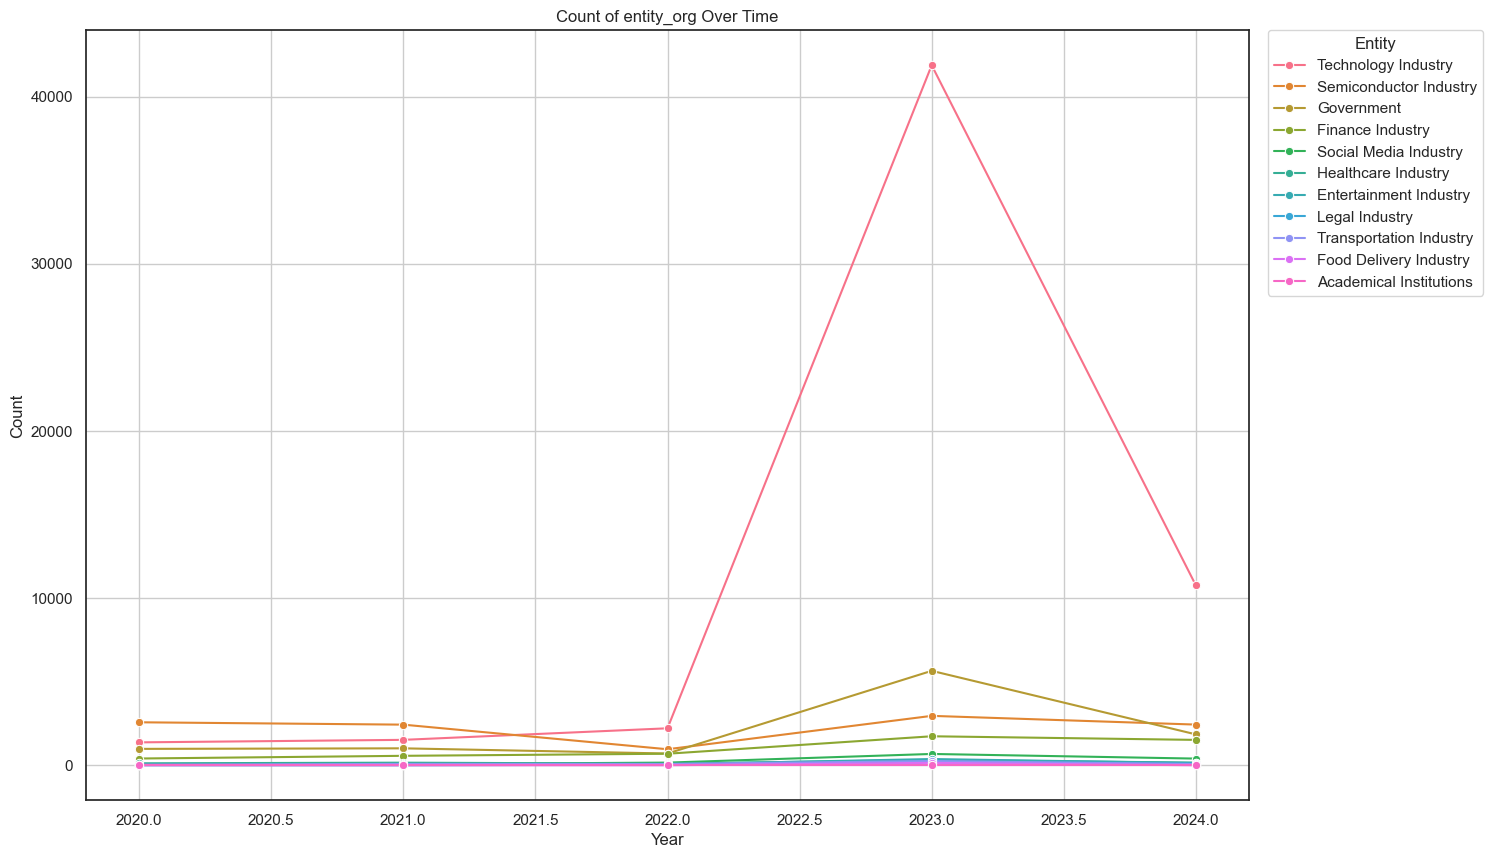

CPU times: user 3.9 s, sys: 104 ms, total: 4 s
Wall time: 3.81 s


In [37]:
%%time
plot_ner_time(news_processed[news_processed['vader_sentiment'] == 'positive'], 'entity_org')

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_ner_time_sentiment(df, col):
    # Function to get positive sentiment data for a given year
    def get_sentiment_data(df, year, entity_column):
        year_df = df[df['year'] == year]
        sentiment_data = []
        for index, row in year_df.iterrows():
            entities = row[entity_column]
            sentiment = row['vader_positive']
            if entities:
                for entity in entities:
                    sentiment_data.append({'entity': entity, 'sentiment': sentiment})
        return pd.DataFrame(sentiment_data)
    
    # Initialize a dictionary to store sentiment data by year and entity type
    sentiment_data_by_year = defaultdict(pd.DataFrame)
    
    # Collect sentiment data for each year and entity type
    for year in range(2020, 2025):  # Including 2024
        sentiment_data_by_year[year] = get_sentiment_data(df, year, col)
    
    # Aggregate sentiment data
    def aggregate_sentiment(df, year, col):
        filtered_df = df[df['entity'].isin(key_entities[col])]
        sentiment_avg = filtered_df.groupby('entity')['sentiment'].mean()
        sentiment_avg.name = year
        return sentiment_avg
    
   # Mapping for name normalization
    mapping = {
        'entity_org': {
            
            'financial glossary': 'Finance Industry',
            'morgan stanley': 'Finance Industry',
            'goldman sachs': 'Finance Industry',
            'zacks': 'Finance Industry',
            'etf': 'Finance Industry',
            'buy': 'Finance Industry',
            'price': 'Finance Industry',
            'nyse': 'Finance Industry',
            'nasdaq': 'Finance Industry',
            'earnings': 'Finance Industry',
            'fintech': 'Finance Industry',
            
            'medical': 'Healthcare Industry',
            'health': 'Healthcare Industry',
            'healthcare': 'Healthcare Industry',
            'cancer': 'Healthcare Industry',
            'covid': 'Healthcare Industry',
            'insurance': 'Healthcare Industry',
            'health insurance': 'Healthcare Industry',
            
            'facebook': 'Social Media Industry',
            'linkedin': 'Social Media Industry',
            'twitter': 'Social Media Industry',
            'whatsapp': 'Social Media Industry',
            'snap': 'Social Media Industry',
            'insta': 'Social Media Industry',
            'instagram': 'Social Media Industry',
            'youtube': 'Social Media Industry',
            
            'congress': 'Government',
            'government': 'Government',
            'white house': 'Government',
            'ccp': 'Government',
            'united state': 'Government',
            'palantir': 'Government',
            'senate': 'Government', 
            'nasa': 'Government',
            'pentagon': 'Government',
            'eu': 'Government',
            'bjp': 'Government',
            
            'court': 'Legal Industry',
            'law': 'Legal Industry',
            'legal': 'Legal Industry',
            'fbi': 'Legal Industry',
            'rule': 'Legal Industry',
            'case': 'Legal Industry',
            'gordon legal': 'Legal Industry',
            
            'nvidia': 'Semiconductor Industry',  
            'intel': 'Semiconductor Industry', 
            'intel corporation': 'Semiconductor Industry',
            'amd': 'Semiconductor Industry', 
            'chip': 'Semiconductor Industry', 
            'gpu': 'Semiconductor Industry', 
            'cpu': 'Semiconductor Industry',
            'tsmc': 'Semiconductor Industry',
            'semiconductor': 'Semiconductor Industry',
            'tpu': 'Semiconductor Industry',
            'apple': 'Semiconductor Industry',
            'tesla': 'Semiconductor Industry',
            'ibm': 'Semiconductor Industry',
            
            'aws': 'Technology Industry', 
            'android': 'Technology Industry', 
            'ai': 'Technology Industry', 
            'ml': 'Technology Industry', 
            'google': 'Technology Industry', 
            'microsoft': 'Technology Industry',
            'bard': 'Technology Industry',
            'openai': 'Technology Industry',
            'chatgpt': 'Technology Industry',
            'gpt': 'Technology Industry',
            'gemini': 'Technology Industry',
            'bing': 'Technology Industry',
            'bing': 'Technology Industry',
            'google news': 'Technology Industry',
            'google deepmind': 'Technology Industry',
            
            'doordash': 'Food Delivery Industry',
            'instacart': 'Food Delivery Industry',
            'legal': 'Food Delivery Industry',
            
            'waymo': 'Transportation Industry',
            'ford': 'Transportation Industry',
            'argo ai': 'Transportation Industry',
            
            'walt disney': 'Entertainment Industry',
            'netflix': 'Entertainment Industry',
            'discovery': 'Entertainment Industry',
            
            'school authority': 'Academical Institutions',
            'mit harvard university': 'Academical Institutions'
            
        },
        'entity_person': {
            'Biden': 'Joe Biden',
            'Musk': 'Elon Musk', 
            'Trump': 'Donald Trump',
            'Pichai': 'Sundar Pichai', 
            'Zuckerberg': 'Mark Zuckerberg',
            'Bankman Fried': 'Sam Bankman Fried', 
            'Buffett': 'Warren Buffett',
            'Putin': 'Vladimir Putin', 
            'Huang': 'Jensen Huang', 
            'Timnit Gebru': 'Gebru'
        },
        'entity_location': {
            'united state': 'USA',
            'america': 'USA',
            'california': 'USA', 
            'florida': 'USA',
            'new york': 'USA',
            'ny': 'USA',
            'texas': 'USA',
            'russia': 'Russia', 
            'india': 'India',
            'china': 'China', 
            'israel': 'Israel', 
            'germany': 'Germany',
            'taiwan': 'Taiwan',
            'beijing': 'China',
            'france': 'France',
            'uk': 'United Kingdom',
            'united kingdom': 'United Kingdom',
            'london': 'United Kingdom',
            'japan': 'Japan',
            'tokyo': 'Japan'
        }
    }
    
    key_entities = {
        'entity_org': [
            'Semiconductor Industry', 'Technology Industry', 'Social Media Industry', 'Healthcare Industry', 
            'Finance Industry', 'Government', 'Legal Industry', 'Transportation Industry',
            'Entertainment Industry', 'Food Delivery Industry', 'Academical Institutions'
        ],
        'entity_person': [
            'Biden', 'Joe Biden', 'Elon Musk', 'Musk', 'Donald Trump', 'Trump', 'Gebru', 
            'Sundar Pichai', 'Pichai', 'Narendra Modi', 'Rebekah Jones', 'Mark Zuckerberg', 
            'Eric Schmidt', 'Bill Gates', 'Michael Kratsios', 'Frida Polli', 'Bankman Fried', 
            'Sam Bankman Fried', 'Zuckerberg', 'Warren Buffett', 'Buffett', 'Vladimir Putin', 
            'Putin', 'Sam Altman', 'Satya Nadella', 'Geoffrey Hinton', 'Jensen Huang', 'Huang', 
            'Steve Wozniak', 'Gary Marcus'
        ],
        'entity_location': [
            'USA', 'Russia', 'China', 'United Kingdom', 'Germany', 
            'France', 'India', 'Israel', 'Taiwan', 'Japan'
        ]
    }
    
    # Normalize entity names
    def normalize_entities(df, col):
        if col in mapping:
            df['entity'] = df['entity'].replace(mapping[col])
        return df
    
    # Process each year for the specified entity type
    combined_sentiment = pd.concat([
        aggregate_sentiment(normalize_entities(sentiment_data_by_year[year], col), year, col)
        for year in range(2020, 2025)  
    ], axis=1).fillna(0).reindex(key_entities[col], fill_value=0)
    
    # Ensure the 'entity' column is present
    combined_sentiment = combined_sentiment.reset_index().rename(columns={'index': 'entity'})
    
    # Melt the DataFrame for plotting
    combined_sentiment_melted = combined_sentiment.melt(
        id_vars=['entity'], var_name='year', value_name='sentiment'
    )
    
    # Sort entities by their sentiment in 2024
    entities_sorted_by_2024 = combined_sentiment.sort_values(by=2024, ascending=False)['entity']
    
    # Plotting the data
    plt.figure(figsize=(15, 10))
    sns.lineplot(
        data=combined_sentiment_melted, x='year', y='sentiment', hue='entity',
        hue_order=entities_sorted_by_2024, marker='o'
    )
    
    # Enhancing the plot
    plt.title('Average Positive Sentiment of {} Over Time'.format(col))
    plt.xlabel('Year')
    plt.ylabel('Average Positive Sentiment')
    plt.legend(title='Entity', bbox_to_anchor=(1.01, 1.01), loc='upper left')
    plt.grid(True)
    
    # Show plot
    plt.show()

# Example usage:
# plot_ner_sentiment(df_news, 'entity_org')  # For organizations
# plot_ner_sentiment(df_news, 'entity_person')  # For persons
# plot_ner_sentiment(df_news, 'entity_location')  # For locations


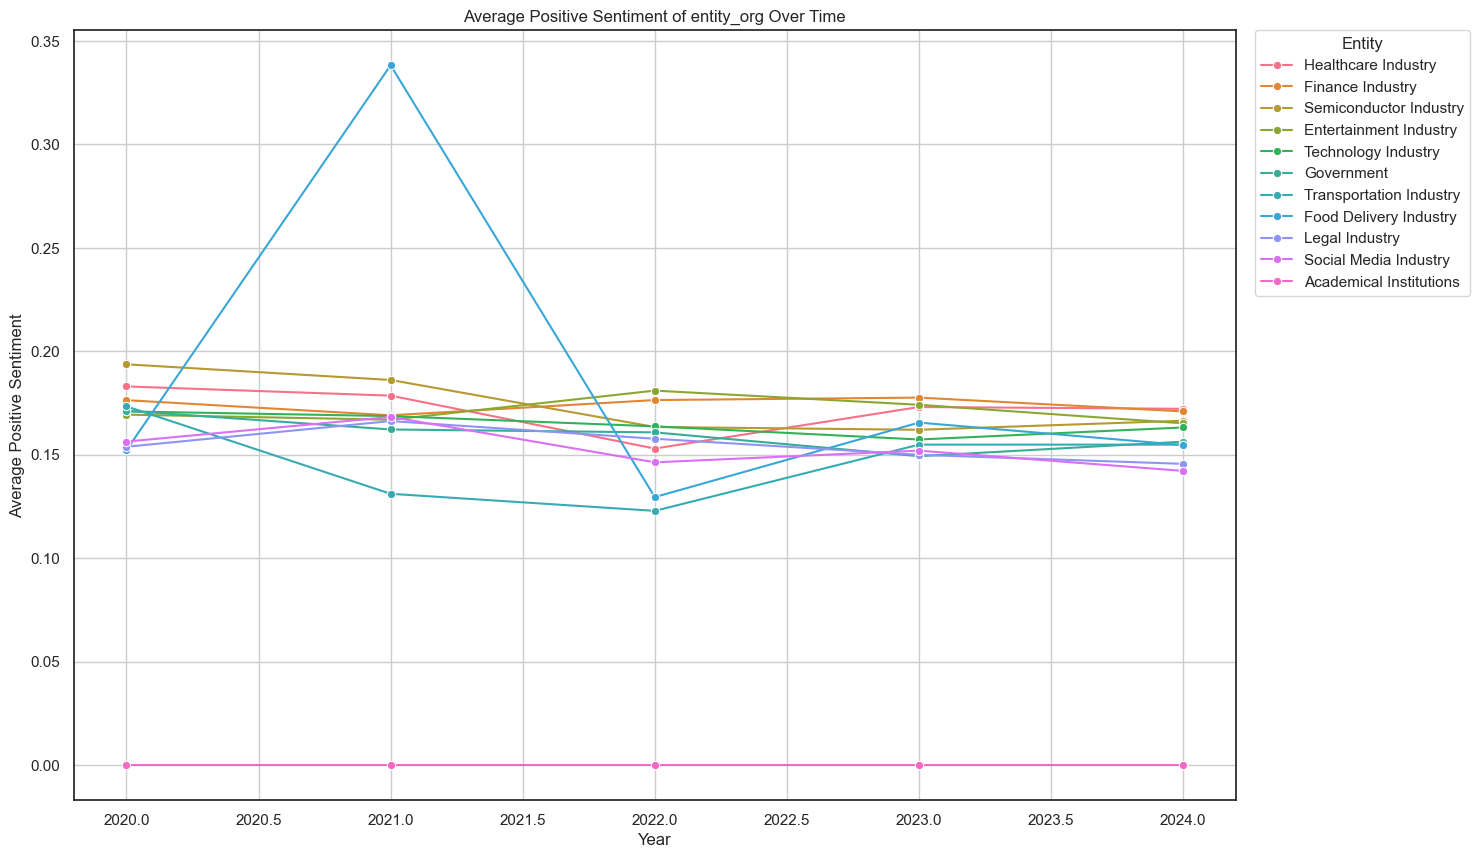

CPU times: user 8.83 s, sys: 158 ms, total: 8.98 s
Wall time: 8.99 s


In [39]:
%%time
plot_ner_time_sentiment(news_processed[news_processed['vader_sentiment'] == 'positive'], 'entity_org')

#### Entity (LOCATION)

In [40]:
news_processed[news_processed['vader_sentiment'] == 'positive'].head(20)

,url,date,language,title,text,year,month,day,text_ner,title_ner,text_cleaned,title_cleaned,text_lemmatized,title_lemmatized,text_tokenized,title_tokenized,text_word_count,vader_sentiment,vader_compound,vader_positive,vader_negative,year_month,entity_org,entity_person,entity_location
0,https://www.fool.com/investing/2023/09/01/ai-stock-thats-screaming-bargain-you-should-buy/?source=eptyholnk0000202&utm_source=yahoo-host&utm_medium=feed&utm_campaign=article&yptr=yahoo?src=rss,2023-09-01,en,1 AI Stock That's a Screaming Bargain You Should Buy Hand Over Fist Right Now | The Motley Fool,\n\n1 AI Stock That's a Screaming Bargain You Should Buy Hand Over Fist Right Now | The Motley Fool\nPlease ensure Javascript is enabled for purposes of website accessibility\n\nSearch\n\nAccessibility\nLog In\n\nHelp\n\n\nJoin The Motley Fool\nAccessibility Menu\n\nOur Services\nInvesting Basics\n\nangle-down\n\nPremium Services\n\n\nStock Advisor\nOur Flagship Service\n\n\nReturn\n509%\n\n\nS&P Return\n132%\n\nRule Breakers\nHigh-growth Stocks\n\n\nReturn\n241%\n\n\nS&P Return\n111%\nRetur...,2023,9,1,AI Stock That s a Screaming Bargain You Should Buy Hand Over Fist Right Now The Motley Fool Please ensure Javascript is enabled for purposes of website accessibility Search Accessibility Log In Help Join The Motley Fool Accessibility Menu Our Services Investing Basics angle down Premium Services Stock Advisor Our Flagship Service Return S P Return Rule Breakers High growth Stocks Return S P Return Returns as of View Our Services Investing How to Invest Money What to Invest In How to Invest i...,AI Stock That s a Screaming Bargain You Should Buy Hand Over Fist Right Now The Motley Fool,ai stock screaming bargain buy hand fist right motley fool please ensure javascript enabled purposes website accessibility search accessibility log help join motley fool accessibility menu services investing basics angle premium services stock advisor flagship service return return rule breakers high growth stocks return return returns view services investing invest money invest invest stocks invest index funds invest etfs invest real estate financial dictionary best accounts best stock brok...,ai stock screaming bargain buy hand fist right motley fool,ai stock screaming bargain buy hand fist right motley fool please ensure javascript enabled purpose website accessibility search accessibility log help join motley fool accessibility menu service investing basic angle premium service stock advisor flagship service return return rule breaker high growth stock return return return view service investing invest money invest invest stock invest index fund invest etf invest real estate financial dictionary best account best stock broker best brok...,ai stock screaming bargain buy hand fist right motley fool,"[ai, stock, screaming, bargain, buy, hand, fist, right, motley, fool, please, ensure, javascript, enabled, purpose, website, accessibility, search, accessibility, log, help, join, motley, fool, accessibility, menu, service, investing, basic, angle, premium, service, stock, advisor, flagship, service, return, return, rule, breaker, high, growth, stock, return, return, return, view, service, investing, invest, money, invest, invest, stock, invest, index, fund, invest, etf, invest, real, estate...","[ai, stock, screaming, bargain, buy, hand, fist, right, motley, fool]",1475,positive,0.9999,0.301,0.070,2023-09,"[etf, hsa, fha, etf, hsa, fha, nyse, samsung, chauhan position stock, apple microsoft amazon, youtube, youtube, globe fool uk fool australia fool canada free tool]","[roth ira, tom david gardner, roth ira, tom david gardner, instagram tiktok tiktok market data]","[taiwan, gpus, taiwan, taiwan, taiwan, taiwan, taiwan]"
1,https://www.zmescience.com/science/news-science/chinese-communist-party-wants-to-use-an-ai-algorithm-to-read-minds-and-test-the-loyalty-of-its-members/,2022-07-20,en,"Chinese Communist Party wants to use an AI algorithm to ""read minds"" and test the loy

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

def plot_ner(df, col):
    # Function to count entities for a given year
    def count_entities(df, year, entity_column):
        year_df = df[df['year'] == year]
        all_entities = [entity for sublist in year_df[entity_column].dropna() for entity in sublist]
        return dict(Counter(all_entities))
    
    # Initialize a dictionary to store counts by year and entity type
    entity_counts_by_year = defaultdict(lambda: defaultdict(Counter))
    
    # Count entities for each year and entity type
    for index, row in df.iterrows():
        year = row['year']
        for entity_type in ['entity_person', 'entity_org', 'entity_location']:
            entities = row[entity_type]
            if entities:
                entity_counts_by_year[year][entity_type].update(entities)
    
    # Convert defaultdict to a regular dict for easier viewing
    entity_counts_by_year = {year: dict(types) for year, types in entity_counts_by_year.items()}
    
    # Create a DataFrame for a given year
    def create_df_for_year(year, entity_counts_by_year):
        data = [
            {'entity_type': entity_type, 'entity': entity, 'count': count}
            for entity_type, entities in entity_counts_by_year[year].items()
            for entity, count in entities.items()
        ]
        return pd.DataFrame(data)
    
    # Create separate DataFrames for each year
    news_data = {}
    for year in range(2020, 2025):  # Including 2024
        news_data[year] = create_df_for_year(year, entity_counts_by_year)
    
    # Get top 200 entities per type per year
    entity_types = ['entity_org', 'entity_person', 'entity_location']
    top_entities = {}
    for year, df_year in news_data.items():
        top_entities[year] = {
            entity_type: df_year[df_year['entity_type'] == entity_type]
            .sort_values('count', ascending=False)
            .head(200)
            .reset_index(drop=True)
            for entity_type in entity_types
        }
    
    
    # Mapping for name normalization
    mapping = {
        'entity_org': {
            
            'financial glossary': 'Finance Industry',
            'morgan stanley': 'Finance Industry',
            'goldman sachs': 'Finance Industry',
            'zacks': 'Finance Industry',
            'etf': 'Finance Industry',
            'buy': 'Finance Industry',
            'price': 'Finance Industry',
            'nyse': 'Finance Industry',
            'nasdaq': 'Finance Industry',
            'earnings': 'Finance Industry',
            'fintech': 'Finance Industry',
            
            'medical': 'Healthcare Industry',
            'health': 'Healthcare Industry',
            'healthcare': 'Healthcare Industry',
            'cancer': 'Healthcare Industry',
            'covid': 'Healthcare Industry',
            'insurance': 'Healthcare Industry',
            'health insurance': 'Healthcare Industry',
            
            'facebook': 'Social Media Industry',
            'linkedin': 'Social Media Industry',
            'twitter': 'Social Media Industry',
            'whatsapp': 'Social Media Industry',
            'snap': 'Social Media Industry',
            'insta': 'Social Media Industry',
            'instagram': 'Social Media Industry',
            'youtube': 'Social Media Industry',
            
            'congress': 'Government',
            'government': 'Government',
            'white house': 'Government',
            'ccp': 'Government',
            'united state': 'Government',
            'palantir': 'Government',
            'senate': 'Government', 
            'nasa': 'Government',
            'pentagon': 'Government',
            'eu': 'Government',
            'bjp': 'Government',
            
            'court': 'Legal Industry',
            'law': 'Legal Industry',
            'legal': 'Legal Industry',
            'fbi': 'Legal Industry',
            'rule': 'Legal Industry',
            'case': 'Legal Industry',
            'gordon legal': 'Legal Industry',
            
            'nvidia': 'Semiconductor Industry',  
            'intel': 'Semiconductor Industry', 
            'intel corporation': 'Semiconductor Industry',
            'amd': 'Semiconductor Industry', 
            'chip': 'Semiconductor Industry', 
            'gpu': 'Semiconductor Industry', 
            'cpu': 'Semiconductor Industry',
            'tsmc': 'Semiconductor Industry',
            'semiconductor': 'Semiconductor Industry',
            'tpu': 'Semiconductor Industry',
            'apple': 'Semiconductor Industry',
            'tesla': 'Semiconductor Industry',
            'ibm': 'Semiconductor Industry',
            
            'aws': 'Technology Industry', 
            'android': 'Technology Industry', 
            'ai': 'Technology Industry', 
            'ml': 'Technology Industry', 
            'google': 'Technology Industry', 
            'microsoft': 'Technology Industry',
            'bard': 'Technology Industry',
            'openai': 'Technology Industry',
            'chatgpt': 'Technology Industry',
            'gpt': 'Technology Industry',
            'gemini': 'Technology Industry',
            'bing': 'Technology Industry',
            'bing': 'Technology Industry',
            'google news': 'Technology Industry',
            'google deepmind': 'Technology Industry',
            
            'doordash': 'Food Delivery Industry',
            'instacart': 'Food Delivery Industry',
            'legal': 'Food Delivery Industry',
            
            'waymo': 'Transportation Industry',
            'ford': 'Transportation Industry',
            'argo ai': 'Transportation Industry',
            
            'walt disney': 'Entertainment Industry',
            'netflix': 'Entertainment Industry',
            'discovery': 'Entertainment Industry',
            
            'school authority': 'Academical Institutions',
            'mit harvard university': 'Academical Institutions'
            
        },
        'entity_person': {
            'Biden': 'Joe Biden',
            'Musk': 'Elon Musk', 
            'Trump': 'Donald Trump',
            'Pichai': 'Sundar Pichai', 
            'Zuckerberg': 'Mark Zuckerberg',
            'Bankman Fried': 'Sam Bankman Fried', 
            'Buffett': 'Warren Buffett',
            'Putin': 'Vladimir Putin', 
            'Huang': 'Jensen Huang', 
            'Timnit Gebru': 'Gebru'
        },
        'entity_location': {
            'united state': 'USA',
            'america': 'USA',
            'california': 'USA', 
            'florida': 'USA',
            'new york': 'USA',
            'ny': 'USA',
            'texas': 'USA',
            'russia': 'Russia', 
            'india': 'India',
            'china': 'China', 
            'israel': 'Israel', 
            'germany': 'Germany',
            'taiwan': 'Taiwan',
            'beijing': 'China',
            'france': 'France',
            'uk': 'United Kingdom',
            'united kingdom': 'United Kingdom',
            'london': 'United Kingdom',
            'japan': 'Japan',
            'tokyo': 'Japan'
        }
    }
    
    key_entities = {
        'entity_org': [
            'Semiconductor Industry', 'Technology Industry', 'Social Media Industry', 'Healthcare Industry', 
            'Finance Industry', 'Government', 'Legal Industry', 'Transportation Industry',
            'Entertainment Industry', 'Food Delivery Industry', 'Academical Institutions'
        ],
        'entity_person': [
            'Biden', 'Joe Biden', 'Elon Musk', 'Musk', 'Donald Trump', 'Trump', 'Gebru', 
            'Sundar Pichai', 'Pichai', 'Narendra Modi', 'Rebekah Jones', 'Mark Zuckerberg', 
            'Eric Schmidt', 'Bill Gates', 'Michael Kratsios', 'Frida Polli', 'Bankman Fried', 
            'Sam Bankman Fried', 'Zuckerberg', 'Warren Buffett', 'Buffett', 'Vladimir Putin', 
            'Putin', 'Sam Altman', 'Satya Nadella', 'Geoffrey Hinton', 'Jensen Huang', 'Huang', 
            'Steve Wozniak', 'Gary Marcus'
        ],
        'entity_location': [
            'USA', 'Russia', 'China', 'United Kingdom', 'Germany', 
            'France', 'India', 'Israel', 'Taiwan', 'Japan'
        ]
    }
    
    
    # Normalize entity names
    def normalize_entities(df, col):
        if col in mapping:
            df['entity'] = df['entity'].replace(mapping[col])
        return df
    
    # Get counts for key entities
    def get_counts(df, year, col):
        filtered_df = df[df['entity'].isin(key_entities[col])]
        counts = filtered_df.groupby('entity')['count'].sum()
        counts.name = year
        return counts
    
    # Process each year for the specified entity type
    combined_counts = pd.concat([
        get_counts(normalize_entities(pd.DataFrame(top_entities[year][col]), col), year, col)
        for year in range(2020, 2025)  # Including 2024
    ], axis=1).fillna(0).reindex(key_entities[col], fill_value=0)
    
    # Ensure the 'entity' column is present
    combined_counts = combined_counts.reset_index().rename(columns={'index': 'entity'})
    
    # Sum counts across all years
    combined_counts['total_count'] = combined_counts.iloc[:, 1:].sum(axis=1)
    
    # Sort by total count
    combined_counts_sorted = combined_counts.sort_values(by='total_count', ascending=False)
    
    # Plotting the data (combined total count for all years)
    plt.figure(figsize=(15, 10))
    sns.barplot(
        data=combined_counts_sorted, x='entity', y='total_count', palette='viridis'
    )
    
    # Enhancing the plot
    plt.title('Total Count of {} Across All Years'.format(col))
    plt.xlabel('Entity')
    plt.ylabel('Total Count')
    plt.xticks(rotation=90)
    plt.grid(True)
    
    # Show plot
    plt.show()

# Example usage:
# plot_ner(df_news, 'entity_org')  # For organizations
# plot_ner(df_news, 'entity_person')  # For persons
# plot_ner(df_news, 'entity_location')  # For locations


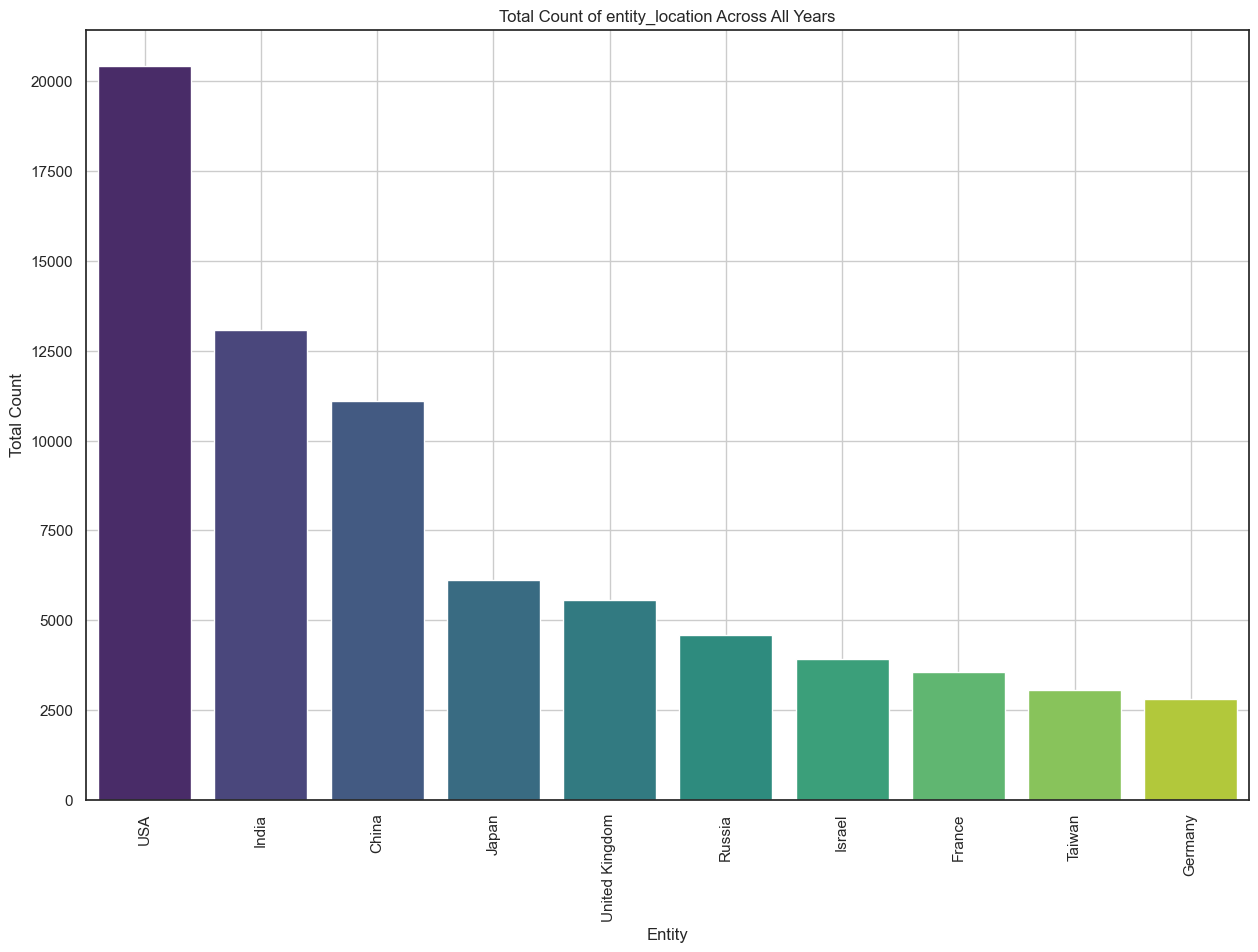

CPU times: user 3.83 s, sys: 105 ms, total: 3.93 s
Wall time: 3.74 s


In [42]:
%%time
plot_ner(news_processed[news_processed['vader_sentiment'] == 'positive'], 'entity_location')

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

def plot_ner_postive(df, col):
    # Function to get sentiment data for a given year
    def get_sentiment_data(df, year, entity_column):
        year_df = df[df['year'] == year]
        sentiment_data = []
        for index, row in year_df.iterrows():
            entities = row[entity_column]
            sentiment = row['vader_positive']
            if entities:
                for entity in entities:
                    sentiment_data.append({'entity': entity, 'sentiment': sentiment})
        return pd.DataFrame(sentiment_data)
    
    # Initialize a dictionary to store sentiment data by year and entity type
    sentiment_data_by_year = defaultdict(pd.DataFrame)
    
    # Collect sentiment data for each year and entity type
    for year in range(2020, 2025):  # Including 2024
        sentiment_data_by_year[year] = get_sentiment_data(df, year, col)
    
    # Aggregate sentiment data
    def aggregate_sentiment(df, year, col):
        filtered_df = df[df['entity'].isin(key_entities[col])]
        sentiment_avg = filtered_df.groupby('entity')['sentiment'].mean()
        sentiment_avg.name = year
        return sentiment_avg
    
  # Mapping for name normalization
    mapping = {
        'entity_org': {
            
            'financial glossary': 'Finance Industry',
            'morgan stanley': 'Finance Industry',
            'goldman sachs': 'Finance Industry',
            'zacks': 'Finance Industry',
            'etf': 'Finance Industry',
            'buy': 'Finance Industry',
            'price': 'Finance Industry',
            'nyse': 'Finance Industry',
            'nasdaq': 'Finance Industry',
            'earnings': 'Finance Industry',
            'fintech': 'Finance Industry',
            
            'medical': 'Healthcare Industry',
            'health': 'Healthcare Industry',
            'healthcare': 'Healthcare Industry',
            'cancer': 'Healthcare Industry',
            'covid': 'Healthcare Industry',
            'insurance': 'Healthcare Industry',
            'health insurance': 'Healthcare Industry',
            
            'facebook': 'Social Media Industry',
            'linkedin': 'Social Media Industry',
            'twitter': 'Social Media Industry',
            'whatsapp': 'Social Media Industry',
            'snap': 'Social Media Industry',
            'insta': 'Social Media Industry',
            'instagram': 'Social Media Industry',
            'youtube': 'Social Media Industry',
            
            'congress': 'Government',
            'government': 'Government',
            'white house': 'Government',
            'ccp': 'Government',
            'united state': 'Government',
            'palantir': 'Government',
            'senate': 'Government', 
            'nasa': 'Government',
            'pentagon': 'Government',
            'eu': 'Government',
            'bjp': 'Government',
            
            'court': 'Legal Industry',
            'law': 'Legal Industry',
            'legal': 'Legal Industry',
            'fbi': 'Legal Industry',
            'rule': 'Legal Industry',
            'case': 'Legal Industry',
            'gordon legal': 'Legal Industry',
            
            'nvidia': 'Semiconductor Industry',  
            'intel': 'Semiconductor Industry', 
            'intel corporation': 'Semiconductor Industry',
            'amd': 'Semiconductor Industry', 
            'chip': 'Semiconductor Industry', 
            'gpu': 'Semiconductor Industry', 
            'cpu': 'Semiconductor Industry',
            'tsmc': 'Semiconductor Industry',
            'semiconductor': 'Semiconductor Industry',
            'tpu': 'Semiconductor Industry',
            'apple': 'Semiconductor Industry',
            'tesla': 'Semiconductor Industry',
            'ibm': 'Semiconductor Industry',
            
            'aws': 'Technology Industry', 
            'android': 'Technology Industry', 
            'ai': 'Technology Industry', 
            'ml': 'Technology Industry', 
            'google': 'Technology Industry', 
            'microsoft': 'Technology Industry',
            'bard': 'Technology Industry',
            'openai': 'Technology Industry',
            'chatgpt': 'Technology Industry',
            'gpt': 'Technology Industry',
            'gemini': 'Technology Industry',
            'bing': 'Technology Industry',
            'bing': 'Technology Industry',
            'google news': 'Technology Industry',
            'google deepmind': 'Technology Industry',
            
            'doordash': 'Food Delivery Industry',
            'instacart': 'Food Delivery Industry',
            'legal': 'Food Delivery Industry',
            
            'waymo': 'Transportation Industry',
            'ford': 'Transportation Industry',
            'argo ai': 'Transportation Industry',
            
            'walt disney': 'Entertainment Industry',
            'netflix': 'Entertainment Industry',
            'discovery': 'Entertainment Industry',
            
            'school authority': 'Academical Institutions',
            'mit harvard university': 'Academical Institutions'
            
        },
        'entity_person': {
            'Biden': 'Joe Biden',
            'Musk': 'Elon Musk', 
            'Trump': 'Donald Trump',
            'Pichai': 'Sundar Pichai', 
            'Zuckerberg': 'Mark Zuckerberg',
            'Bankman Fried': 'Sam Bankman Fried', 
            'Buffett': 'Warren Buffett',
            'Putin': 'Vladimir Putin', 
            'Huang': 'Jensen Huang', 
            'Timnit Gebru': 'Gebru'
        },
        'entity_location': {
            'united state': 'USA',
            'america': 'USA',
            'california': 'USA', 
            'florida': 'USA',
            'new york': 'USA',
            'ny': 'USA',
            'texas': 'USA',
            'russia': 'Russia', 
            'india': 'India',
            'china': 'China', 
            'israel': 'Israel', 
            'germany': 'Germany',
            'taiwan': 'Taiwan',
            'beijing': 'China',
            'france': 'France',
            'uk': 'United Kingdom',
            'united kingdom': 'United Kingdom',
            'london': 'United Kingdom',
            'japan': 'Japan',
            'tokyo': 'Japan'
        }
    }
    
    key_entities = {
        'entity_org': [
            'Semiconductor Industry', 'Technology Industry', 'Social Media Industry', 'Healthcare Industry', 
            'Finance Industry', 'Government', 'Legal Industry', 'Transportation Industry',
            'Entertainment Industry', 'Food Delivery Industry', 'Academical Institutions'
        ],
        'entity_person': [
            'Biden', 'Joe Biden', 'Elon Musk', 'Musk', 'Donald Trump', 'Trump', 'Gebru', 
            'Sundar Pichai', 'Pichai', 'Narendra Modi', 'Rebekah Jones', 'Mark Zuckerberg', 
            'Eric Schmidt', 'Bill Gates', 'Michael Kratsios', 'Frida Polli', 'Bankman Fried', 
            'Sam Bankman Fried', 'Zuckerberg', 'Warren Buffett', 'Buffett', 'Vladimir Putin', 
            'Putin', 'Sam Altman', 'Satya Nadella', 'Geoffrey Hinton', 'Jensen Huang', 'Huang', 
            'Steve Wozniak', 'Gary Marcus'
        ],
        'entity_location': [
            'USA', 'Russia', 'China', 'United Kingdom', 'Germany', 
            'France', 'India', 'Israel', 'Taiwan', 'Japan'
        ]
    }
    
    
    # Normalize entity names
    def normalize_entities(df, col):
        if col in mapping:
            df['entity'] = df['entity'].replace(mapping[col])
        return df
    
    # Process each year for the specified entity type
    combined_sentiment = pd.concat([
        aggregate_sentiment(normalize_entities(sentiment_data_by_year[year], col), year, col)
        for year in range(2020, 2025)  # Including 2024
    ], axis=1).fillna(0).reindex(key_entities[col], fill_value=0)
    
    # Ensure the 'entity' column is present
    combined_sentiment = combined_sentiment.reset_index().rename(columns={'index': 'entity'})
    
    # Compute average sentiment across all years
    combined_sentiment['average_sentiment'] = combined_sentiment.iloc[:, 1:].mean(axis=1)
    
    # Sort by average sentiment
    combined_sentiment_sorted = combined_sentiment.sort_values(by='average_sentiment', ascending=False)
    
    # Plotting the data (average sentiment across all years)
    plt.figure(figsize=(15, 10))
    barplot = sns.barplot(
        data=combined_sentiment_sorted, x='entity', y='average_sentiment'
    )

    # Enhancing the plot
    plt.title('Average Positive Sentiment of {} Across All Years'.format(col))
    plt.xlabel('Entity')
    plt.ylabel('Average Positive Sentiment')
    plt.xticks(rotation=90)
    plt.grid(True)
    
    # Show plot
    plt.show()

# Example usage:
# plot_ner(df_news, 'entity_org')  # For organizations
# plot_ner(df_news, 'entity_person')  # For persons
# plot_ner(df_news, 'entity_location')  # For locations


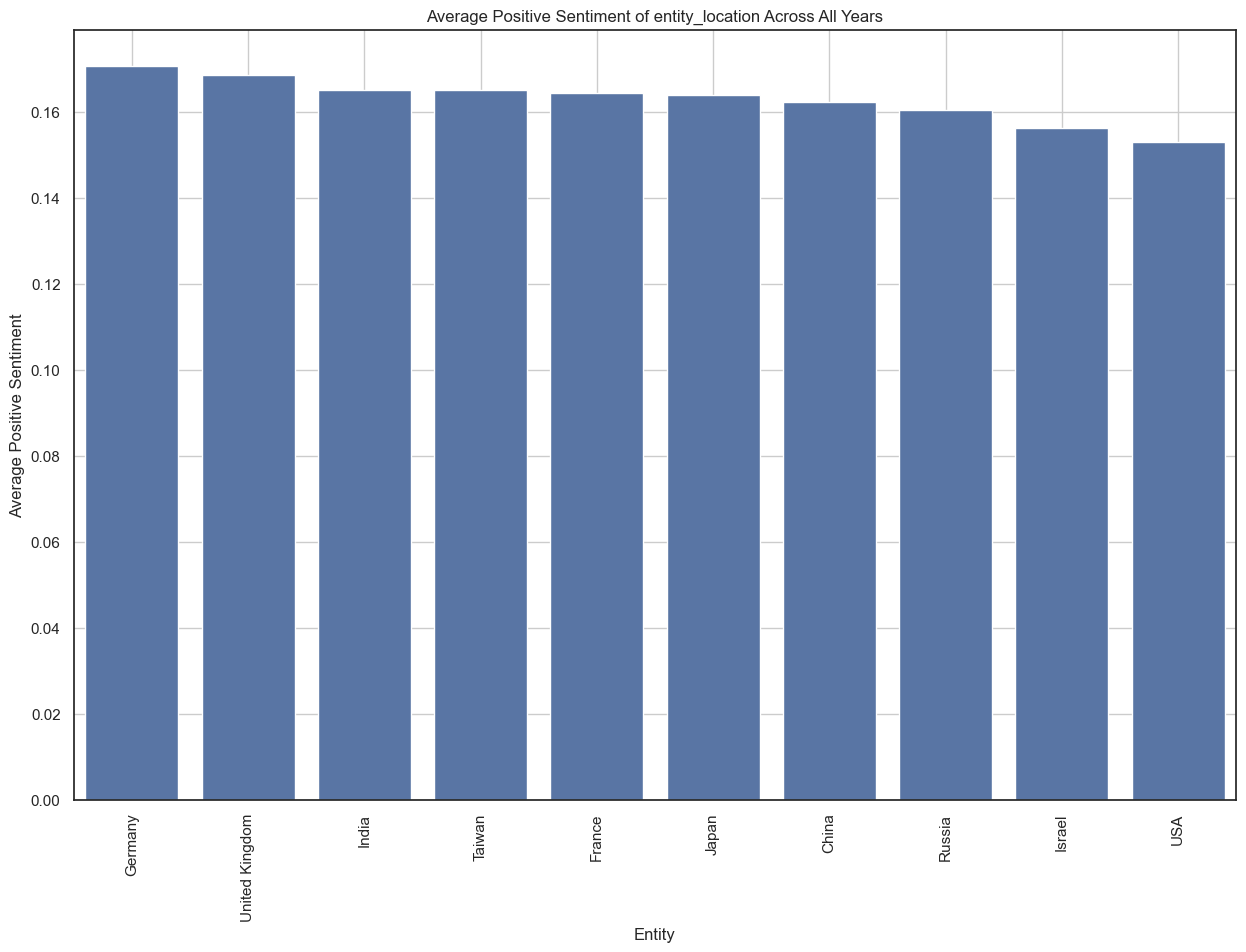

CPU times: user 3.29 s, sys: 107 ms, total: 3.4 s
Wall time: 3.2 s


In [44]:
%%time
plot_ner_postive(news_processed[news_processed['vader_sentiment'] == 'positive'], 'entity_location')

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

def plot_ner_negative(df, col):
    # Function to get sentiment data for a given year
    def get_sentiment_data(df, year, entity_column):
        year_df = df[df['year'] == year]
        sentiment_data = []
        for index, row in year_df.iterrows():
            entities = row[entity_column]
            sentiment = -row['vader_negative']
            if entities:
                for entity in entities:
                    sentiment_data.append({'entity': entity, 'sentiment': sentiment})
        return pd.DataFrame(sentiment_data)
    
    # Initialize a dictionary to store sentiment data by year and entity type
    sentiment_data_by_year = defaultdict(pd.DataFrame)
    
    # Collect sentiment data for each year and entity type
    for year in range(2020, 2025):  # Including 2024
        sentiment_data_by_year[year] = get_sentiment_data(df, year, col)
    
    # Aggregate sentiment data
    def aggregate_sentiment(df, year, col):
        filtered_df = df[df['entity'].isin(key_entities[col])]
        sentiment_avg = filtered_df.groupby('entity')['sentiment'].mean()
        sentiment_avg.name = year
        return sentiment_avg
    
  # Mapping for name normalization
    mapping = {
        'entity_org': {
            
            'financial glossary': 'Finance Industry',
            'morgan stanley': 'Finance Industry',
            'goldman sachs': 'Finance Industry',
            'zacks': 'Finance Industry',
            'etf': 'Finance Industry',
            'buy': 'Finance Industry',
            'price': 'Finance Industry',
            'nyse': 'Finance Industry',
            'nasdaq': 'Finance Industry',
            'earnings': 'Finance Industry',
            'fintech': 'Finance Industry',
            
            'medical': 'Healthcare Industry',
            'health': 'Healthcare Industry',
            'healthcare': 'Healthcare Industry',
            'cancer': 'Healthcare Industry',
            'covid': 'Healthcare Industry',
            'insurance': 'Healthcare Industry',
            'health insurance': 'Healthcare Industry',
            
            'facebook': 'Social Media Industry',
            'linkedin': 'Social Media Industry',
            'twitter': 'Social Media Industry',
            'whatsapp': 'Social Media Industry',
            'snap': 'Social Media Industry',
            'insta': 'Social Media Industry',
            'instagram': 'Social Media Industry',
            'youtube': 'Social Media Industry',
            
            'congress': 'Government',
            'government': 'Government',
            'white house': 'Government',
            'ccp': 'Government',
            'united state': 'Government',
            'palantir': 'Government',
            'senate': 'Government', 
            'nasa': 'Government',
            'pentagon': 'Government',
            'eu': 'Government',
            'bjp': 'Government',
            
            'court': 'Legal Industry',
            'law': 'Legal Industry',
            'legal': 'Legal Industry',
            'fbi': 'Legal Industry',
            'rule': 'Legal Industry',
            'case': 'Legal Industry',
            'gordon legal': 'Legal Industry',
            
            'nvidia': 'Semiconductor Industry',  
            'intel': 'Semiconductor Industry', 
            'intel corporation': 'Semiconductor Industry',
            'amd': 'Semiconductor Industry', 
            'chip': 'Semiconductor Industry', 
            'gpu': 'Semiconductor Industry', 
            'cpu': 'Semiconductor Industry',
            'tsmc': 'Semiconductor Industry',
            'semiconductor': 'Semiconductor Industry',
            'tpu': 'Semiconductor Industry',
            'apple': 'Semiconductor Industry',
            'tesla': 'Semiconductor Industry',
            'ibm': 'Semiconductor Industry',
            
            'aws': 'Technology Industry', 
            'android': 'Technology Industry', 
            'ai': 'Technology Industry', 
            'ml': 'Technology Industry', 
            'google': 'Technology Industry', 
            'microsoft': 'Technology Industry',
            'bard': 'Technology Industry',
            'openai': 'Technology Industry',
            'chatgpt': 'Technology Industry',
            'gpt': 'Technology Industry',
            'gemini': 'Technology Industry',
            'bing': 'Technology Industry',
            'bing': 'Technology Industry',
            'google news': 'Technology Industry',
            'google deepmind': 'Technology Industry',
            
            'doordash': 'Food Delivery Industry',
            'instacart': 'Food Delivery Industry',
            'legal': 'Food Delivery Industry',
            
            'waymo': 'Transportation Industry',
            'ford': 'Transportation Industry',
            'argo ai': 'Transportation Industry',
            
            'walt disney': 'Entertainment Industry',
            'netflix': 'Entertainment Industry',
            'discovery': 'Entertainment Industry',
            
            'school authority': 'Academical Institutions',
            'mit harvard university': 'Academical Institutions'
            
        },
        'entity_person': {
            'Biden': 'Joe Biden',
            'Musk': 'Elon Musk', 
            'Trump': 'Donald Trump',
            'Pichai': 'Sundar Pichai', 
            'Zuckerberg': 'Mark Zuckerberg',
            'Bankman Fried': 'Sam Bankman Fried', 
            'Buffett': 'Warren Buffett',
            'Putin': 'Vladimir Putin', 
            'Huang': 'Jensen Huang', 
            'Timnit Gebru': 'Gebru'
        },
        'entity_location': {
            'united state': 'USA',
            'america': 'USA',
            'california': 'USA', 
            'florida': 'USA',
            'new york': 'USA',
            'ny': 'USA',
            'texas': 'USA',
            'russia': 'Russia', 
            'india': 'India',
            'china': 'China', 
            'israel': 'Israel', 
            'germany': 'Germany',
            'taiwan': 'Taiwan',
            'beijing': 'China',
            'france': 'France',
            'uk': 'United Kingdom',
            'united kingdom': 'United Kingdom',
            'london': 'United Kingdom',
            'japan': 'Japan',
            'tokyo': 'Japan'
        }
    }
    
    key_entities = {
        'entity_org': [
            'Semiconductor Industry', 'Technology Industry', 'Social Media Industry', 'Healthcare Industry', 
            'Finance Industry', 'Government', 'Legal Industry', 'Transportation Industry',
            'Entertainment Industry', 'Food Delivery Industry', 'Academical Institutions'
        ],
        'entity_person': [
            'Biden', 'Joe Biden', 'Elon Musk', 'Musk', 'Donald Trump', 'Trump', 'Gebru', 
            'Sundar Pichai', 'Pichai', 'Narendra Modi', 'Rebekah Jones', 'Mark Zuckerberg', 
            'Eric Schmidt', 'Bill Gates', 'Michael Kratsios', 'Frida Polli', 'Bankman Fried', 
            'Sam Bankman Fried', 'Zuckerberg', 'Warren Buffett', 'Buffett', 'Vladimir Putin', 
            'Putin', 'Sam Altman', 'Satya Nadella', 'Geoffrey Hinton', 'Jensen Huang', 'Huang', 
            'Steve Wozniak', 'Gary Marcus'
        ],
        'entity_location': [
            'USA', 'Russia', 'China', 'United Kingdom', 'Germany', 
            'France', 'India', 'Israel', 'Taiwan', 'Japan'
        ]
    }
    
    
    # Normalize entity names
    def normalize_entities(df, col):
        if col in mapping:
            df['entity'] = df['entity'].replace(mapping[col])
        return df
    
    # Process each year for the specified entity type
    combined_sentiment = pd.concat([
        aggregate_sentiment(normalize_entities(sentiment_data_by_year[year], col), year, col)
        for year in range(2020, 2025)  # Including 2024
    ], axis=1).fillna(0).reindex(key_entities[col], fill_value=0)
    
    # Ensure the 'entity' column is present
    combined_sentiment = combined_sentiment.reset_index().rename(columns={'index': 'entity'})
    
    # Compute average sentiment across all years
    combined_sentiment['average_sentiment'] = combined_sentiment.iloc[:, 1:].mean(axis=1)
    
    # Sort by average sentiment
    combined_sentiment_sorted = combined_sentiment.sort_values(by='average_sentiment', ascending=False)
    
    # Plotting the data (average sentiment across all years)
    plt.figure(figsize=(15, 10))
    barplot = sns.barplot(
        data=combined_sentiment_sorted, x='entity', y='average_sentiment'
    )

    # Enhancing the plot
    plt.title('Average Negative Sentiment of {} Across All Years'.format(col))
    plt.xlabel('Entity')
    plt.ylabel('Average Negative Sentiment')
    plt.xticks(rotation=90)
    plt.grid(True)
    
    # Show plot
    plt.show()

# Example usage:
# plot_ner(df_news, 'entity_org')  # For organizations
# plot_ner(df_news, 'entity_person')  # For persons
# plot_ner(df_news, 'entity_location')  # For locations


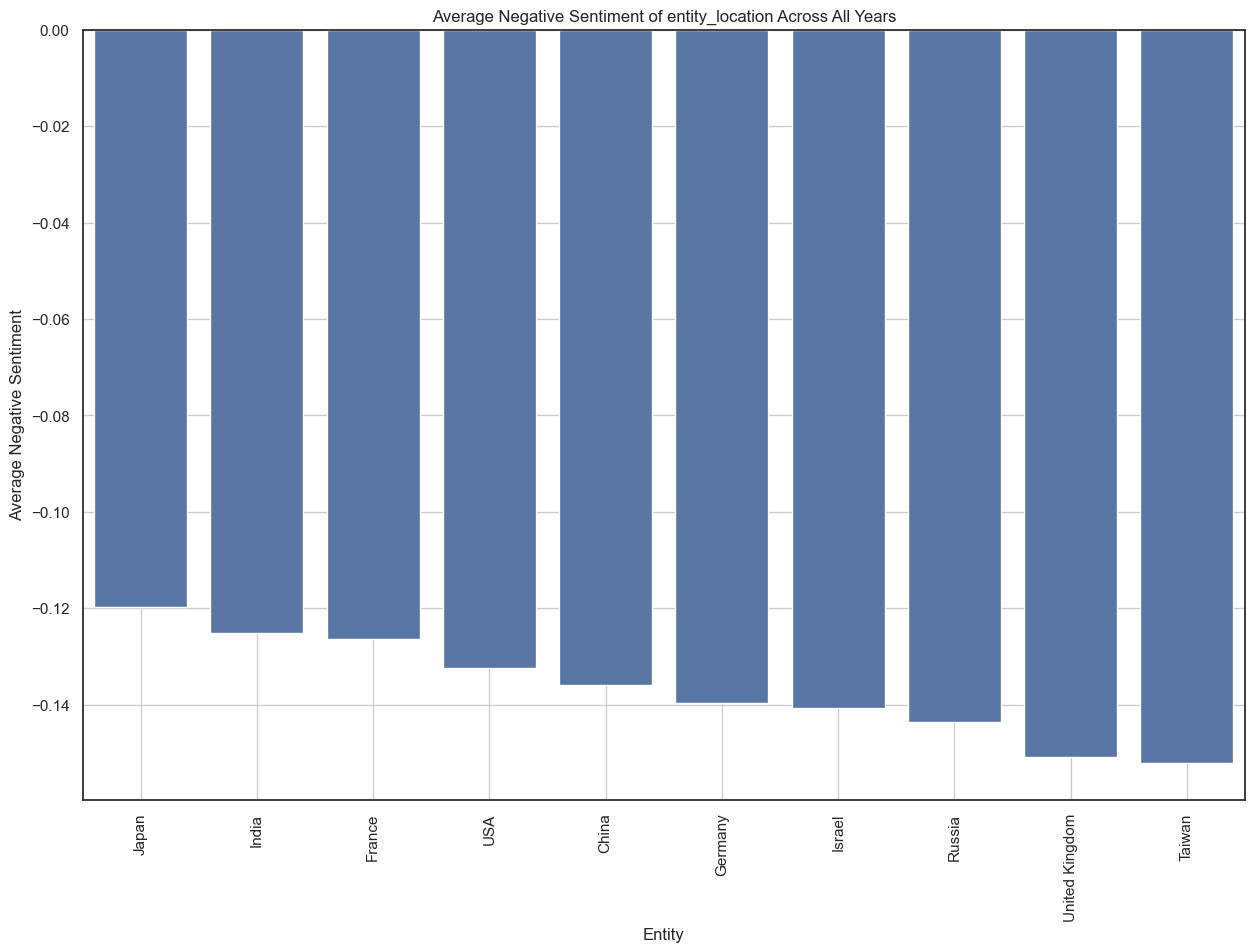

CPU times: user 512 ms, sys: 67.7 ms, total: 580 ms
Wall time: 377 ms


In [46]:
%%time
plot_ner_negative(news_processed[news_processed['vader_sentiment'] == 'negative'], 'entity_location')

### Leverage appropriate NLP techniques to identify organizations, people and locations, then apply targeted sentiment
- What types of companies (based on the lines of business) are planning to invest in these technologies today or near future (success stories)?
- What types of applications cannot currently be transformed by AI, based on today's state of technology (failures)?

#### Industry Comparison - Positive in Semiconductor vs Negative in Government

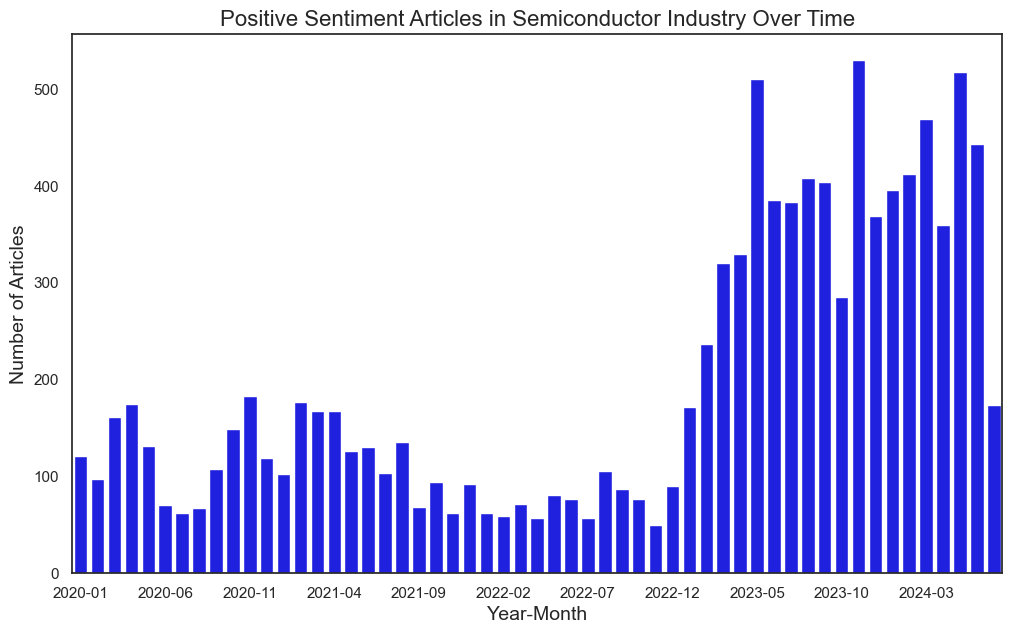

In [50]:
positive_industry_news = news_processed[(
    news_processed['vader_sentiment'] == 'positive') 
    & (news_processed['text_tokenized'].apply(lambda tokens: 
                                              'nvidia' in tokens 
                                              or 'intel' in tokens
                                              or 'amd' in tokens
                                              or 'chip' in tokens
                                              or 'gpu' in tokens
                                              or 'tsmc' in tokens
                                              or 'apple' in tokens
                                              or 'tesla' in tokens
                                              or 'ibm' in tokens
                                             ))][['year_month', 'vader_sentiment']]

# Count the number of positive sentiment articles per year-month
positive_counts = positive_industry_news['year_month'].value_counts().sort_index()


plt.figure(figsize=(12, 7))
sns.barplot(x=positive_counts.index, y=positive_counts.values, color='blue')
plt.title('Positive Sentiment Articles in Semiconductor Industry Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
# Skip some xlabels
every_nth = 5  # Change this number to display every nth label
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.show()

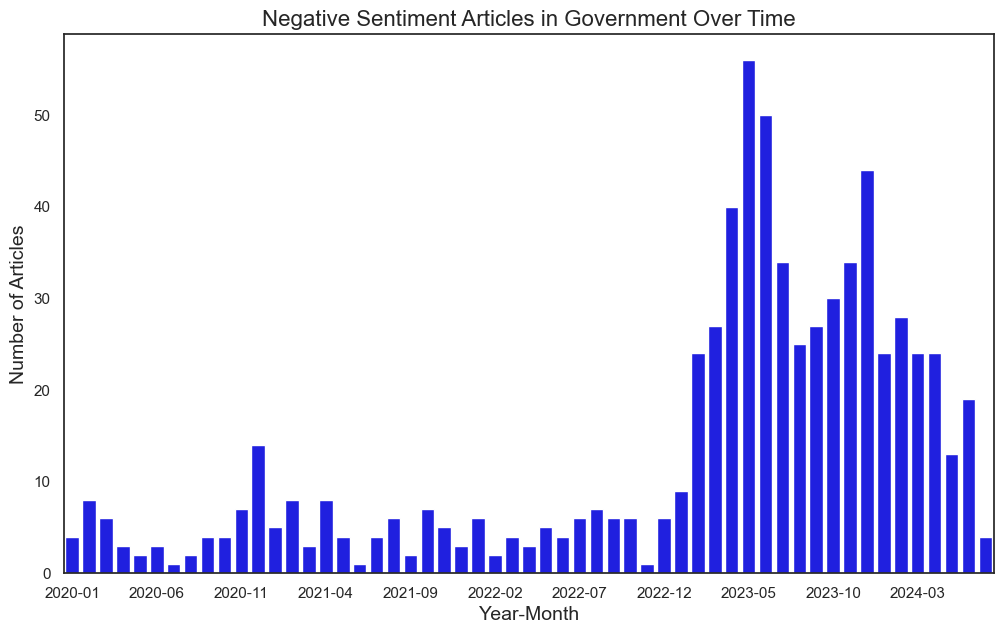

In [52]:
negative_industry_news = news_processed[(
    news_processed['vader_sentiment'] == 'negative') 
    & (news_processed['text_tokenized'].apply(lambda tokens: 
                                              'congress' in tokens 
                                              or 'government' in tokens
                                              or 'white house' in tokens
                                              or 'ccp' in tokens
                                              or 'palantir' in tokens
                                              or 'senate' in tokens
                                              or 'nasa' in tokens
                                              or 'pentagon' in tokens
                                              or 'ibm' in tokens
                                              or 'eu' in tokens
                                              or 'bjp' in tokens
                                             ))][['year_month', 'vader_sentiment']]

# Count the number of positive sentiment articles per year-month
negative_counts = negative_industry_news['year_month'].value_counts().sort_index()


plt.figure(figsize=(12, 7))
sns.barplot(x=negative_counts.index, y=positive_counts.values, color='blue')
plt.title('Negative Sentiment Articles in Government Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
# Skip some xlabels
every_nth = 5  # Change this number to display every nth label
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.show()

#### Industry Comparison - Positive in Nvidia vs Positive in Intel

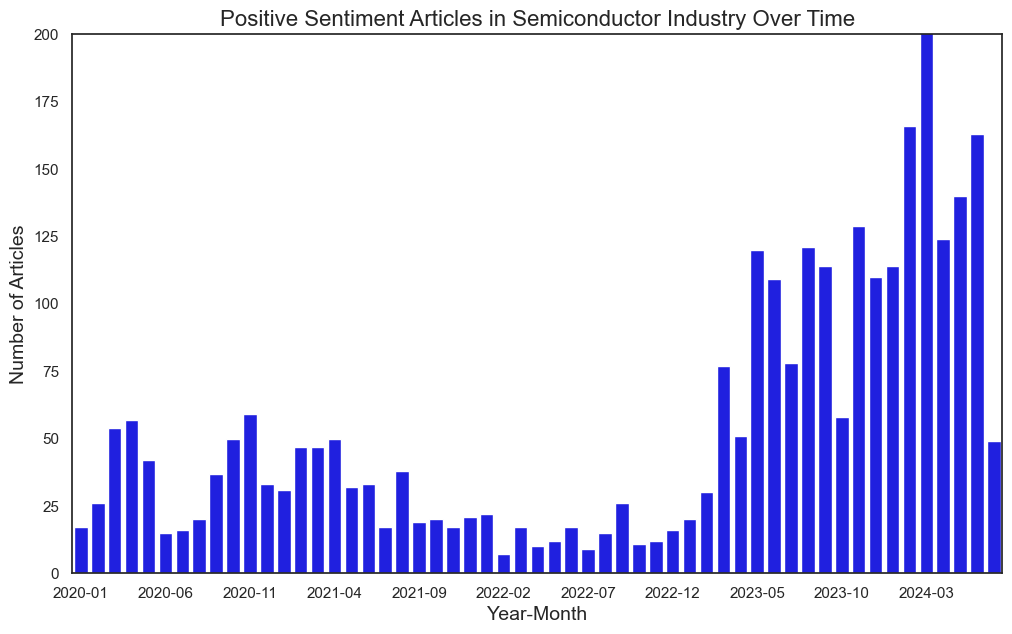

In [58]:
positive_industry_news = news_processed[(
    news_processed['vader_sentiment'] == 'positive') 
    & (news_processed['text_tokenized'].apply(lambda tokens: 'nvidia' in tokens))][['year_month', 'vader_sentiment']]

# Count the number of positive sentiment articles per year-month
positive_counts = positive_industry_news['year_month'].value_counts().sort_index()


plt.figure(figsize=(12, 7))
sns.barplot(x=positive_counts.index, y=positive_counts.values, color='blue')
plt.title('Positive Sentiment Articles in Semiconductor Industry Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.ylim(0, 200)
# Skip some xlabels
every_nth = 5  # Change this number to display every nth label
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.show()

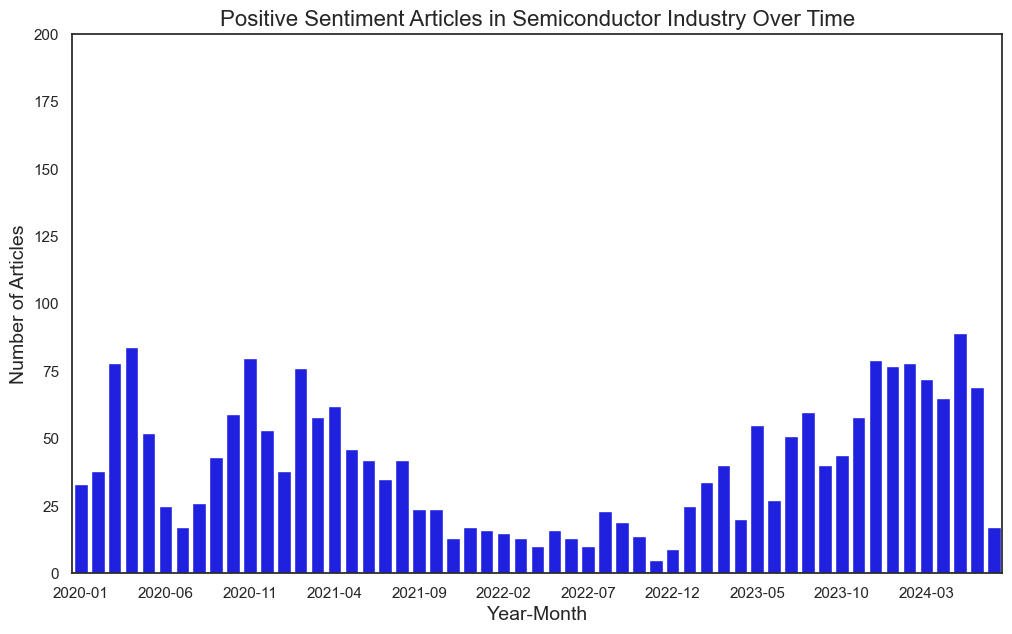

In [57]:
positive_industry_news = news_processed[(
    news_processed['vader_sentiment'] == 'positive') 
    & (news_processed['text_tokenized'].apply(lambda tokens: 'intel' in tokens))][['year_month', 'vader_sentiment']]

# Count the number of positive sentiment articles per year-month
positive_counts = positive_industry_news['year_month'].value_counts().sort_index()


plt.figure(figsize=(12, 7))
sns.barplot(x=positive_counts.index, y=positive_counts.values, color='blue')
plt.title('Positive Sentiment Articles in Semiconductor Industry Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.ylim(0, 200)
# Skip some xlabels
every_nth = 5  # Change this number to display every nth label
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.show()

In [47]:
# news_processed.to_parquet('news_processed_with_sentiment_entity.parquet')

In [ ]:
# news_processed.to_csv('news_processed_with_sentiment_entity.csv', index=False)